# Cleaning Kangaroo dataset

In [1326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from peb_util import map_label_to_kwh

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [1327]:
df = pd.read_csv('./datasets/Kangaroo.csv')

### Drop duplicate rows

In [1328]:
df.drop_duplicates('id', inplace=True)

Convert PEB before removing province col

In [1329]:
df["epc_kwh"] = df.apply(map_label_to_kwh, axis=1)
df.drop(columns='epcScore', inplace=True)

Continue converting other values

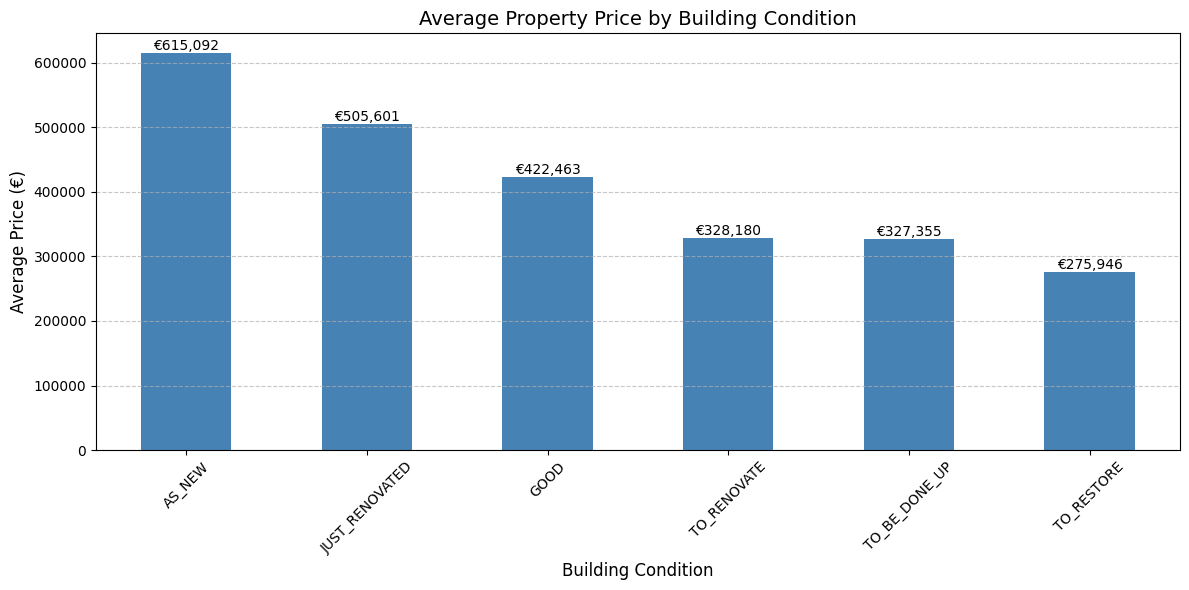

In [1330]:
# Calculate the average price per heating type
hbuilding_condition_price = df.groupby('buildingCondition')['price'].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = hbuilding_condition_price.plot(kind='bar', color='steelblue')

# Add title and labels
plt.title('Average Property Price by Building Condition', fontsize=14)
plt.xlabel('Building Condition', fontsize=12)
plt.ylabel('Average Price (€)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for i, value in enumerate(hbuilding_condition_price):
    plt.text(i, value + 5000, f'€{value:,.0f}', ha='center', fontsize=10)

# Replace NaN in x-axis labels with "Not Specified"
labels = [item.get_text() if item.get_text() != 'nan' else 'Not Specified' 
          for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)

plt.tight_layout()
plt.show()

In [1331]:
label_to_score = {
    'TO_RESTORE': 0,
    'TO_BE_DONE_UP': 1,
    'TO_RENOVATE': 2,
    'GOOD': 3,
    'JUST_RENOVATED': 4,
    'AS_NEW': 5
}

df['buildingCondition'] = df['buildingCondition'].map(label_to_score)

Find trend and convert FloodZoneType according to it

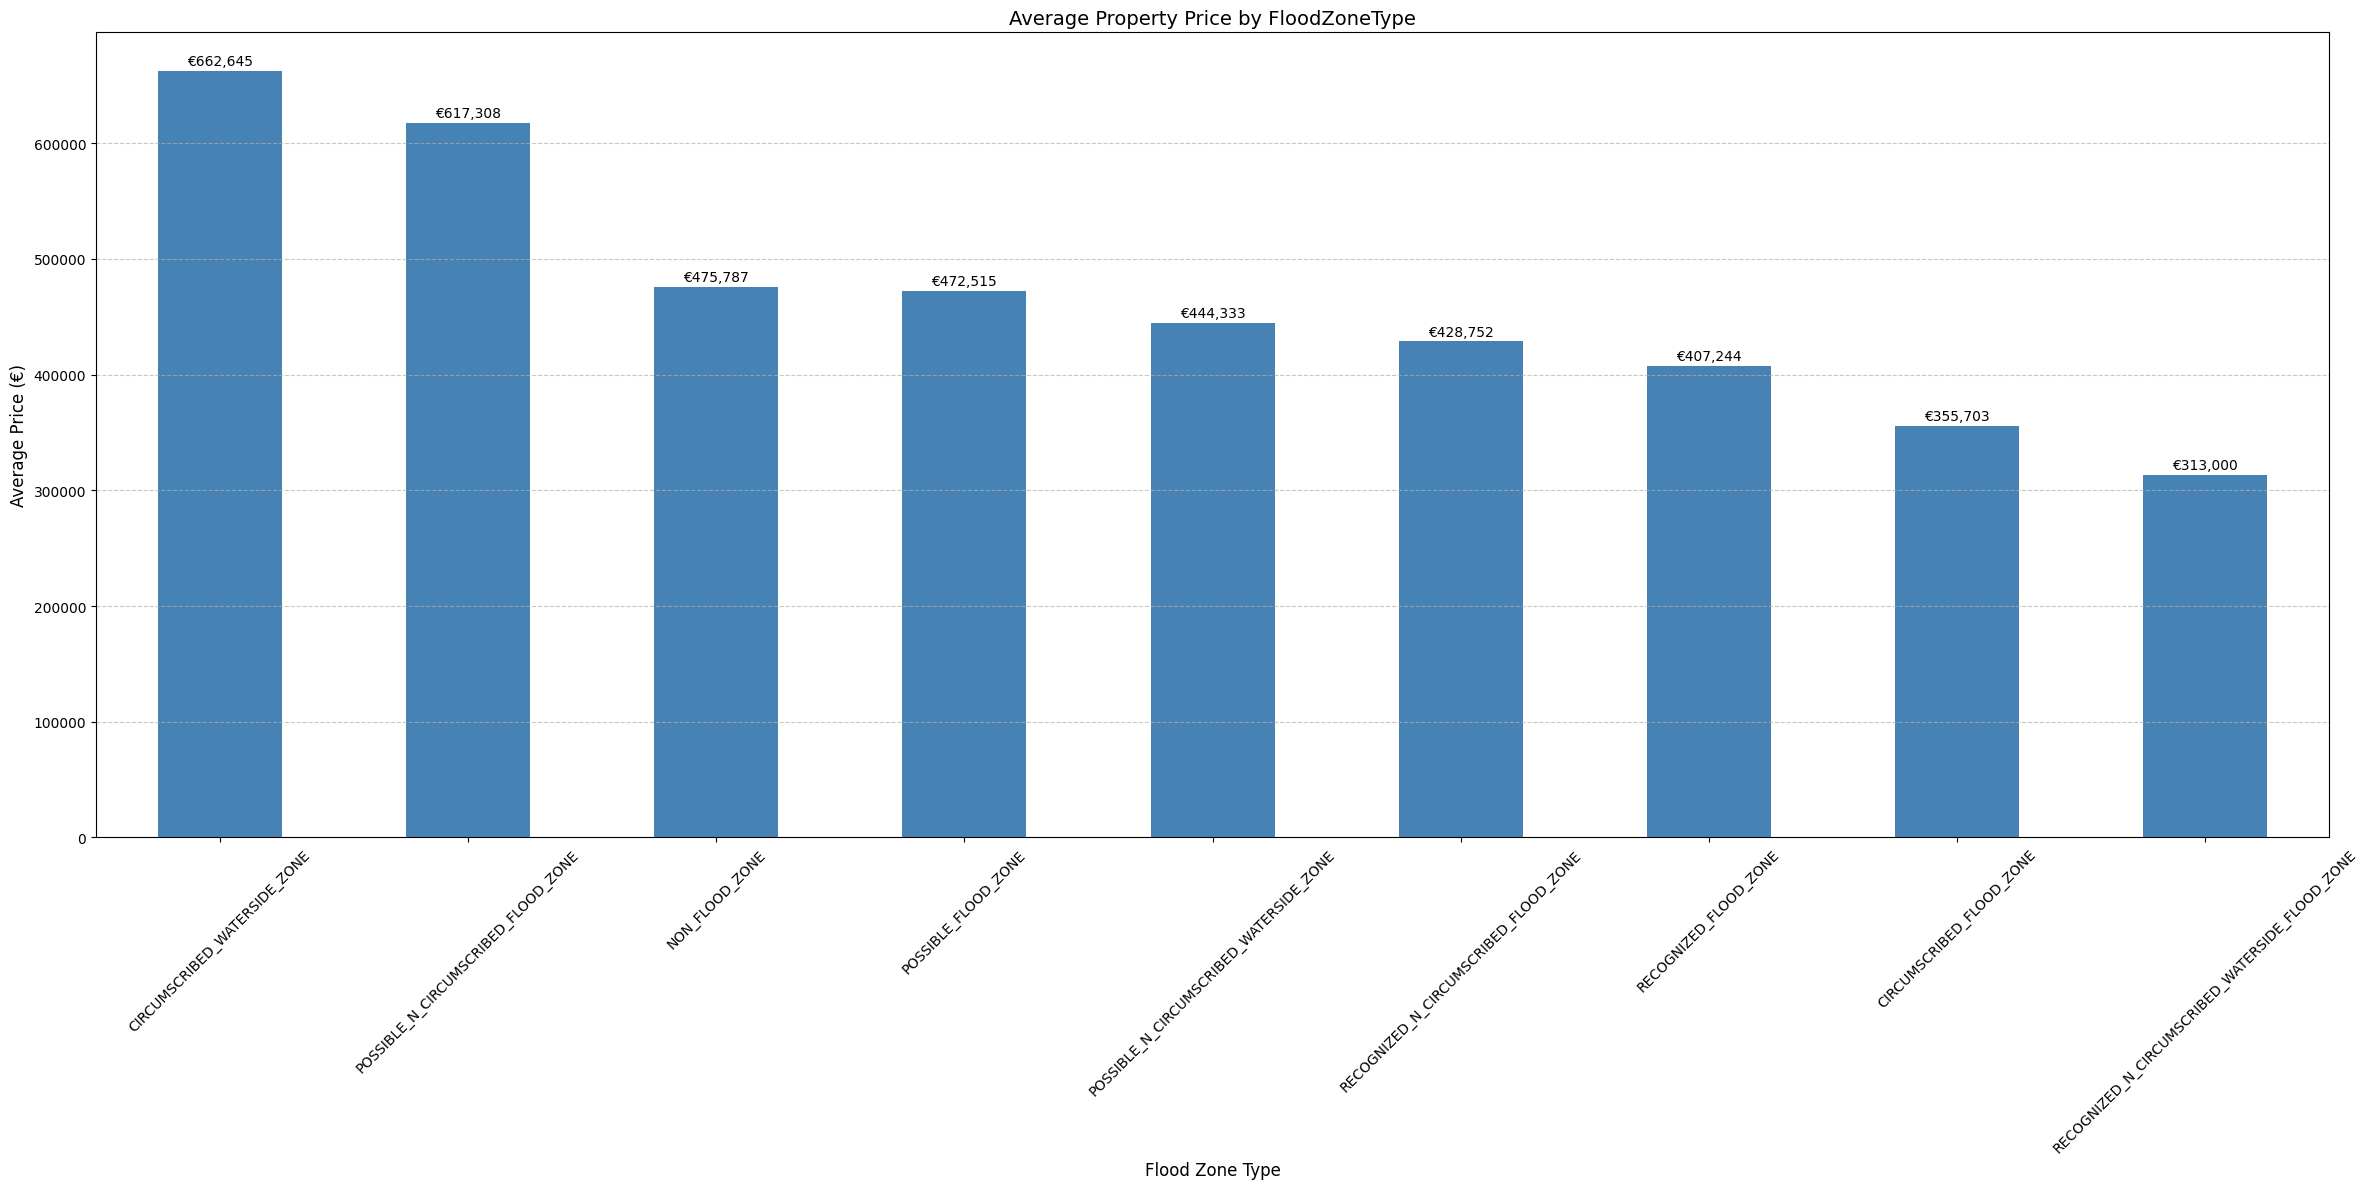

In [1332]:
# Calculate the average price per heating type
flood_zone_price = df.groupby('floodZoneType')['price'].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(24, 12))
ax = flood_zone_price.plot(kind='bar', color='steelblue')

# Add title and labels
plt.title('Average Property Price by FloodZoneType', fontsize=14)
plt.xlabel('Flood Zone Type', fontsize=12)
plt.ylabel('Average Price (€)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for i, value in enumerate(flood_zone_price):
    plt.text(i, value + 5000, f'€{value:,.0f}', ha='center', fontsize=10)

# Replace NaN in x-axis labels with "Not Specified"
labels = [item.get_text() if item.get_text() != 'nan' else 'Not Specified' 
          for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)

plt.tight_layout()
plt.show()

In [1333]:
label_to_score = {
    'CIRCUMSCRIBED_WATERSIDE_ZONE': 8,
    'POSSIBLE_N_CIRCUMSCRIBED_FLOOD_ZONE': 7, 
    'NON_FLOOD_ZONE': 6,
    'POSSIBLE_FLOOD_ZONE': 5, 
    'POSSIBLE_N_CIRCUMSCRIBED_WATERSIDE_ZONE': 4,
    'RECOGNIZED_N_CIRCUMSCRIBED_FLOOD_ZONE': 3,
    'RECOGNIZED_FLOOD_ZONE': 2,
    'CIRCUMSCRIBED_FLOOD_ZONE': 1,
    'RECOGNIZED_N_CIRCUMSCRIBED_WATERSIDE_FLOOD_ZONE': 0
}

df['floodZoneType'] = df['floodZoneType'].map(label_to_score)

Find trend and convert HeatingType according to it

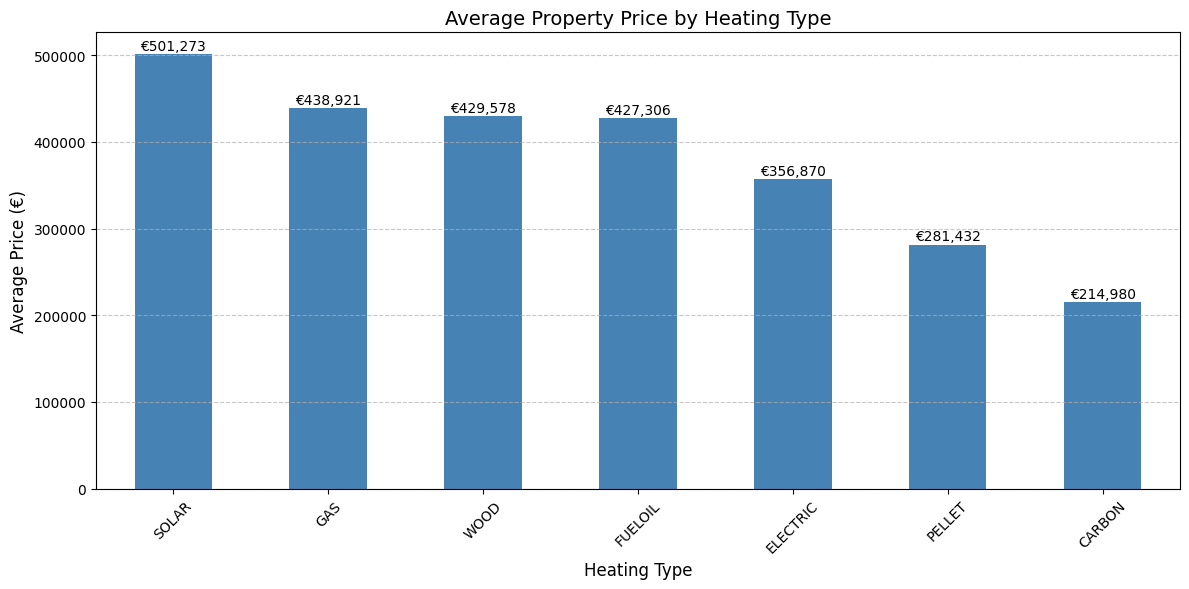

In [1334]:
# Calculate the average price per heating type
heating_price = df.groupby('heatingType')['price'].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = heating_price.plot(kind='bar', color='steelblue')

# Add title and labels
plt.title('Average Property Price by Heating Type', fontsize=14)
plt.xlabel('Heating Type', fontsize=12)
plt.ylabel('Average Price (€)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for i, value in enumerate(heating_price):
    plt.text(i, value + 5000, f'€{value:,.0f}', ha='center', fontsize=10)

# Replace NaN in x-axis labels with "Not Specified"
labels = [item.get_text() if item.get_text() != 'nan' else 'Not Specified' 
          for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)

plt.tight_layout()
plt.show()

In [1335]:
label_to_score = {
    'CARBON' : 0,
    'PELLET' : 1,
    'WOOD' : 2,
    'FUELOIL' : 3,
    'ELECTRIC' : 4,
    'GAS' : 5,
    'SOLAR' : 6
}

df['heatingType'] = df['heatingType'].map(label_to_score)

### Drop the useless columns

In [1336]:
df.drop(columns=['Unnamed: 0', 'id', 'url', 'postCode', 'province', 'locality', 'monthlyCost', 'hasBalcony', 'accessibleDisabledPeople'], inplace=True)

## Visualize missing values

In [1337]:
df.isna().sum()

type                            0
subtype                         0
bedroomCount                 6810
bathroomCount               13696
habitableSurface            12585
roomCount                   58420
hasAttic                    67852
hasBasement                 51052
hasDressingRoom             77739
diningRoomSurface           73467
hasDiningRoom               66227
buildingCondition           22376
buildingConstructionYear    31262
facedeCount                 27129
floorCount                  42822
streetFacadeWidth           64858
hasLift                     61323
floodZoneType               35902
heatingType                 33214
hasHeatPump                 72895
hasPhotovoltaicPanels       72319
hasThermicPanels            77255
kitchenSurface              56105
kitchenType                 38451
landSurface                 40827
hasLivingRoom               37492
livingRoomSurface           51418
hasGarden                   64410
gardenSurface               64410
gardenOrientat

<Axes: >

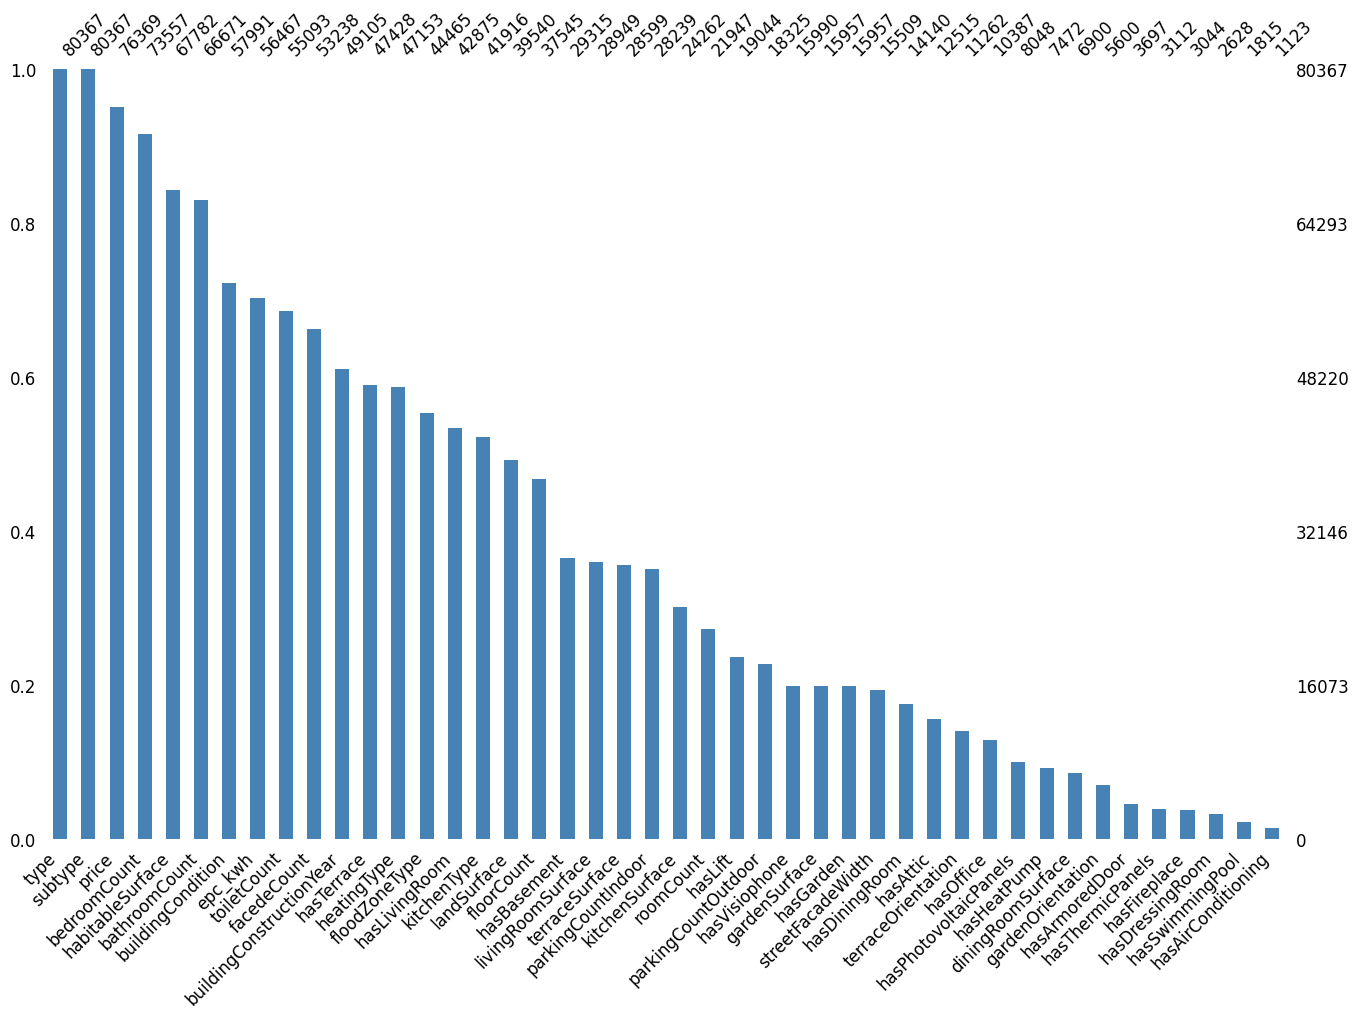

In [1338]:
msno.bar(df, color="steelblue", figsize=(16, 10), fontsize=12, sort="descending")

Drop null prices rows

In [1339]:
df.dropna(subset='price', inplace=True)

Drop hasGarden because it has same number of missing values than gardenSurface

In [1340]:
df.drop(columns=['hasGarden'], inplace=True)

Replace values

In [1341]:
df['hasTerrace'].replace(pd.NA, False, inplace=True)
df['hasLivingRoom'].replace(pd.NA, False, inplace=True)
df['hasBasement'].replace(pd.NA, False, inplace=True)
df['hasLift'].replace(pd.NA, False, inplace=True)

df['hasVisiophone'].replace(pd.NA, False, inplace=True)
df['hasDiningRoom'].replace(pd.NA, False, inplace=True)
df['hasAttic'].replace(pd.NA, False, inplace=True)
df['hasOffice'].replace(pd.NA, False, inplace=True)
df['hasPhotovoltaicPanels'].replace(pd.NA, False, inplace=True)
df['hasHeatPump'].replace(pd.NA, False, inplace=True)
df['hasArmoredDoor'].replace(pd.NA, False, inplace=True)
df['hasThermicPanels'].replace(pd.NA, False, inplace=True)
df['hasFireplace'].replace(pd.NA, False, inplace=True)
df['hasDressingRoom'].replace(pd.NA, False, inplace=True)
df['hasSwimmingPool'].replace(pd.NA, False, inplace=True)
df['hasAirConditioning'].replace(pd.NA, False, inplace=True)

#assuming that if the surface is not specified, it is 0 (not present)
df['gardenSurface'].fillna(0.0, inplace=True)
df['livingRoomSurface'].fillna(0.0, inplace=True)
df['terraceSurface'].fillna(0.0, inplace=True)

df['kitchenType'].replace(pd.NA, 'NOT_INSTALLED', inplace=True) #assume that if the kitchen type is not specified, it is not installed

C:\Users\ImJus\AppData\Local\Temp\ipykernel_15204\1439463637.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['hasTerrace'].replace(pd.NA, False, inplace=True)
C:\Users\ImJus\AppData\Local\Temp\ipykernel_15204\1439463637.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['hasTerrace'].repl

Find trend and convert KitchenType according to it

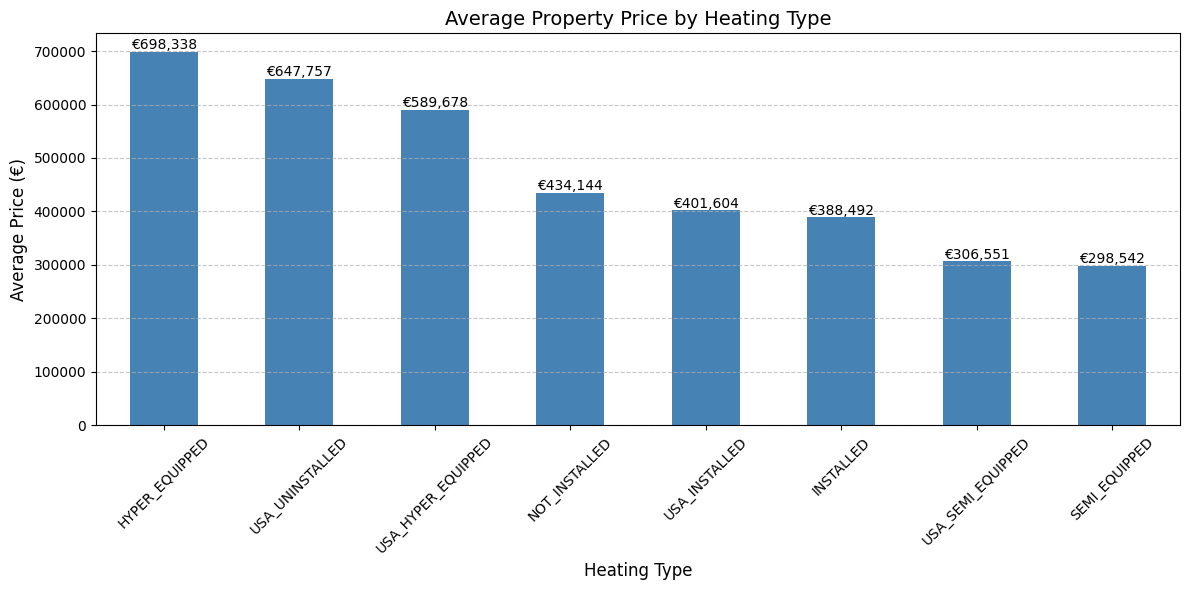

In [1342]:
# Calculate the average price per kitchenType
kitchen_type_price = df.groupby('kitchenType')['price'].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = kitchen_type_price.plot(kind='bar', color='steelblue')

# Add title and labels
plt.title('Average Property Price by Heating Type', fontsize=14)
plt.xlabel('Heating Type', fontsize=12)
plt.ylabel('Average Price (€)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for i, value in enumerate(kitchen_type_price):
    plt.text(i, value + 5000, f'€{value:,.0f}', ha='center', fontsize=10)

# Replace NaN in x-axis labels with "Not Specified"
labels = [item.get_text() if item.get_text() != 'nan' else 'Not Specified' 
          for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)

plt.tight_layout()
plt.show()

In [1343]:
label_to_score = {
    'SEMI_EQUIPPED' : 0,
    'NOT_INSTALLED' : 1,
    'USA_SEMI_EQUIPPED' : 2,
    'USA_UNINSTALLED' : 3,
    'INSTALLED' : 4,
    'USA_INSTALLED' : 5,
    'HYPER_EQUIPPED' : 6,
    'USA_HYPER_EQUIPPED' : 7
}

df['kitchenType'] = df['kitchenType'].map(label_to_score)

Drop columns with too many missing values

In [1344]:
df.drop(columns=['gardenOrientation', 'diningRoomSurface', 'terraceOrientation'], inplace=True)

Display missings values again

<Axes: >

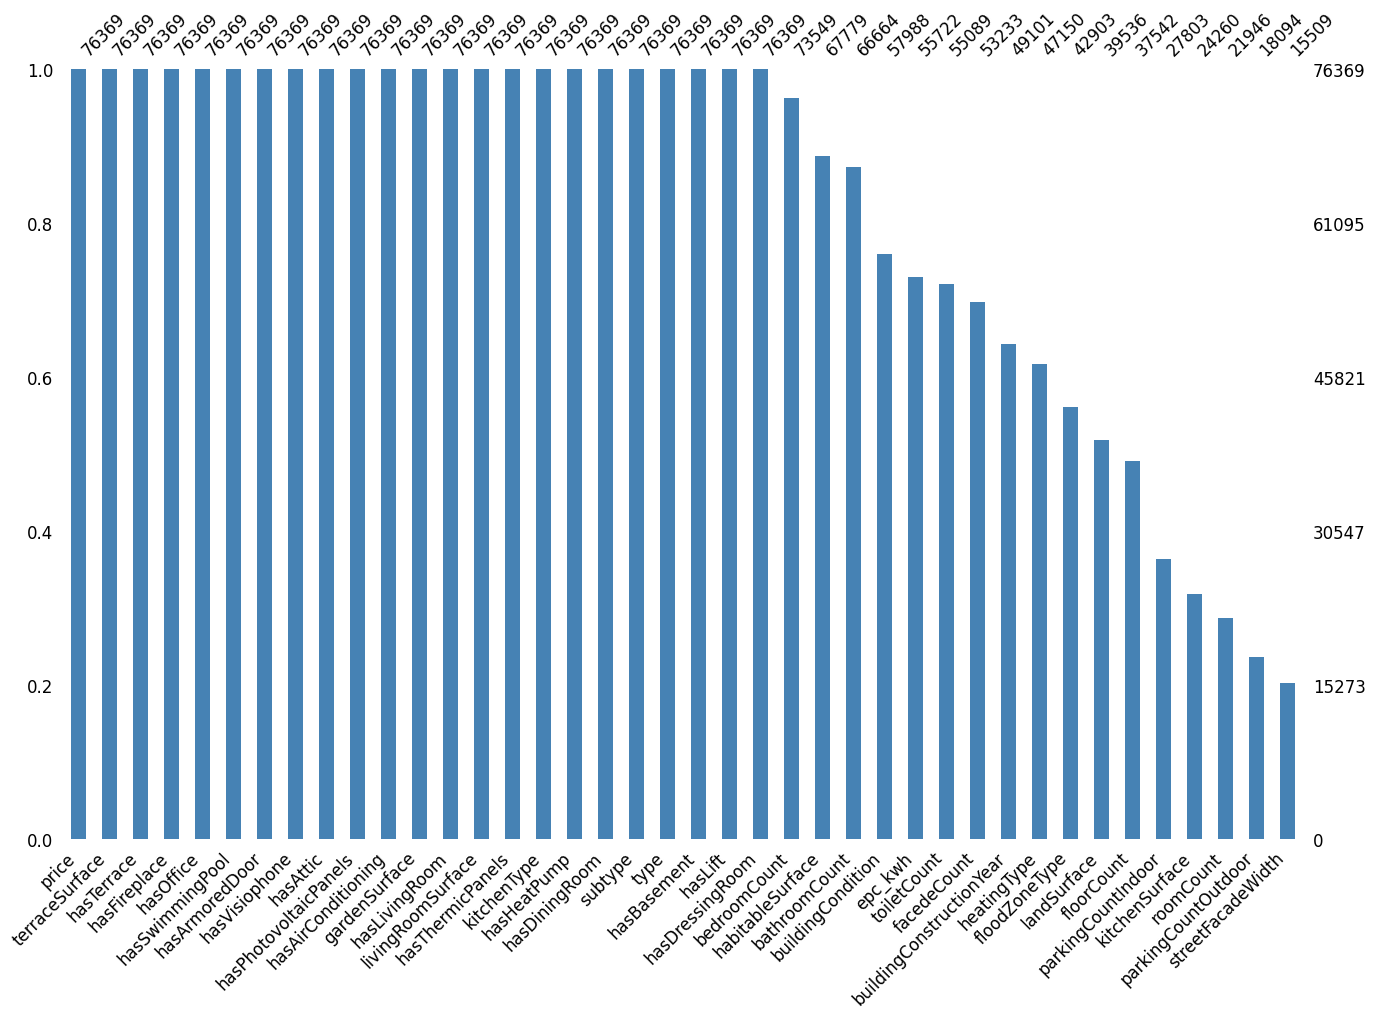

In [1345]:
msno.bar(df, color="steelblue", figsize=(16, 10), fontsize=12, sort="descending")

### Remove Outliers

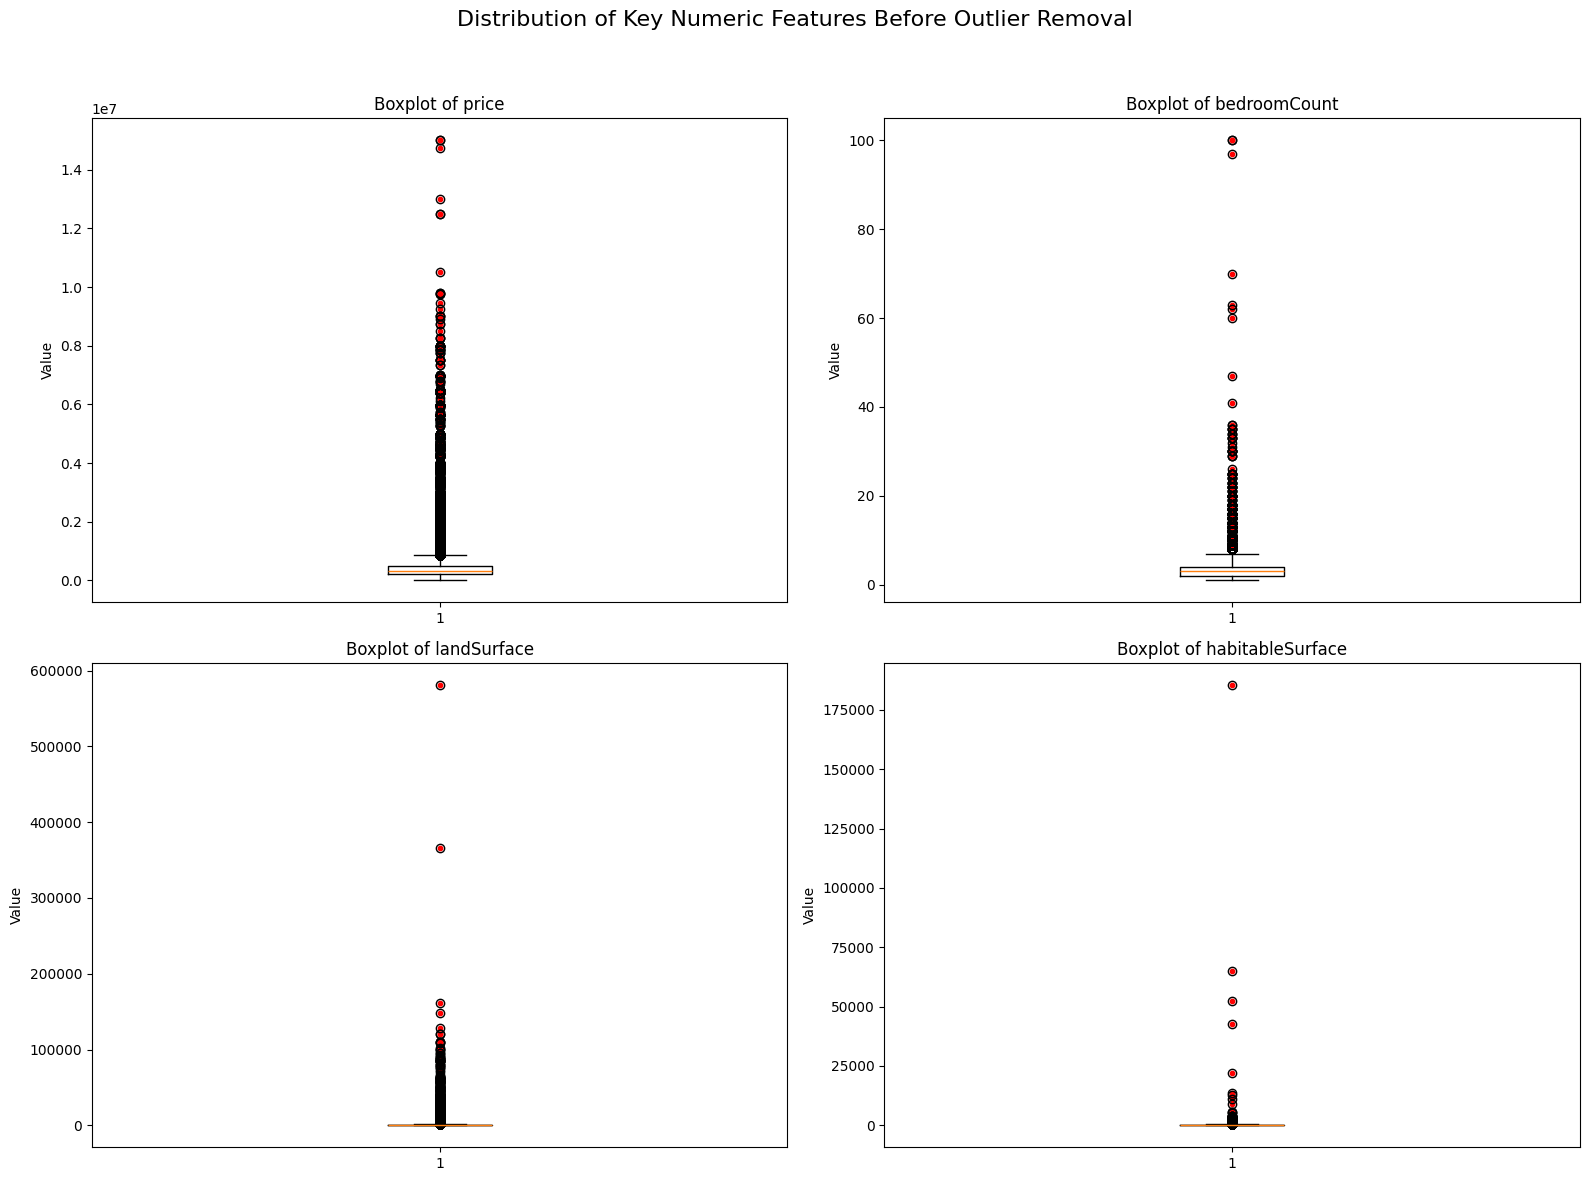

Total rows before removing outliers: 76369
Total rows after removing outliers: 22132
Total outliers removed: 54237
Percentage of data retained: 29.0%

Outliers removed per column:
  price: 3231 (4.2%)
  habitableSurface: 991 (1.3%)
  landSurface: 1549 (2.0%)
  bedroomCount: 255 (0.3%)
  bathroomCount: 52 (0.1%)
  toiletCount: 57 (0.1%)


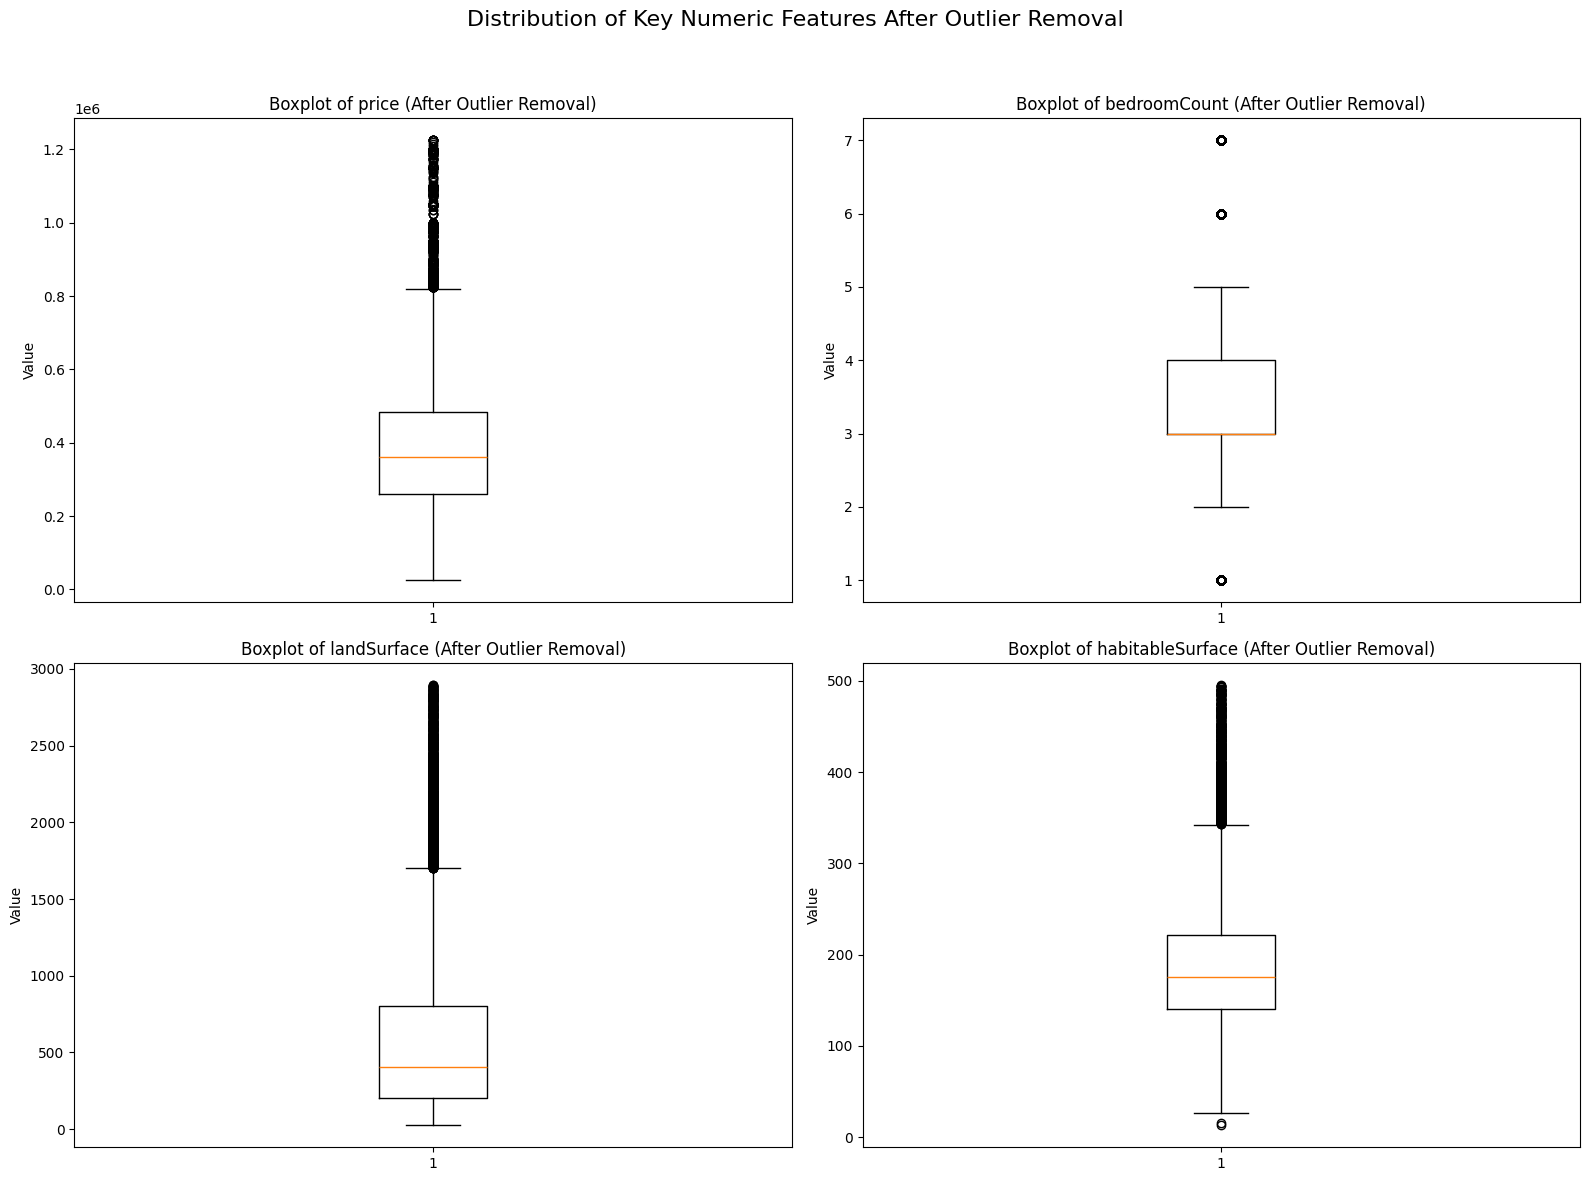

In [1346]:
#Thanks Copilot for this long piece of code 

def remove_outliers_iqr(df, columns, multiplier=1.5, min_thresholds=None):
    """
    Remove outliers from the dataframe using the IQR method.
    
    Parameters:
    df (pandas.DataFrame): The dataframe to process
    columns (list): List of column names to check for outliers
    multiplier (float): Multiplier for IQR to determine outlier threshold
    min_thresholds (dict): Dictionary with minimum threshold values for specific columns
    
    Returns:
    pandas.DataFrame: Dataframe with outliers removed
    """
    df_clean = df.copy()
    
    if min_thresholds is None:
        min_thresholds = {}
    
    outlier_counts = {}
    total_outliers = 0
    
    for column in columns:
        # Calculate Q1, Q3 and IQR
        Q1 = df_clean[column].quantile(0.25)
        Q3 = df_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate the outlier thresholds
        lower_bound = Q1 - (multiplier * IQR)
        upper_bound = Q3 + (multiplier * IQR)
        
        # Apply minimum threshold if specified
        if column in min_thresholds:
            lower_bound = max(lower_bound, min_thresholds[column])
        
        # Identify outliers
        outliers = df_clean[(df_clean[column] < lower_bound) | (df_clean[column] > upper_bound)]
        outlier_count = len(outliers)
        outlier_counts[column] = outlier_count
        total_outliers += outlier_count
        
        # Filter out the outliers
        df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]
    
    print(f"Total rows before removing outliers: {len(df)}")
    print(f"Total rows after removing outliers: {len(df_clean)}")
    print(f"Total outliers removed: {len(df) - len(df_clean)}")
    print(f"Percentage of data retained: {len(df_clean)/len(df)*100:.1f}%")
    print("\nOutliers removed per column:")
    
    for col, count in outlier_counts.items():
        print(f"  {col}: {count} ({count/len(df)*100:.1f}%)")
    
    return df_clean




# Let's visualize the distribution of key numeric columns before removing outliers
important_columns = ['price', 'bedroomCount', 'landSurface', 'habitableSurface']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distribution of Key Numeric Features Before Outlier Removal', fontsize=16)

for i, column in enumerate(important_columns):
    row, col = divmod(i, 2)
    
    # Create boxplot
    axes[row, col].boxplot(df[column].dropna())
    axes[row, col].set_title(f'Boxplot of {column}')
    axes[row, col].set_ylabel('Value')
    
    # Add some points to show extreme values
    outliers = df[abs(df[column] - df[column].mean()) > 3*df[column].std()][column]
    if not outliers.empty:
        axes[row, col].scatter(np.ones(len(outliers)), outliers, color='red', s=10)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Now remove outliers from key numeric columns
# Focus on columns highly correlated with price and most important for property valuation
columns_for_outlier_removal = [
    'price', 
    'habitableSurface',
    'landSurface',
    'bedroomCount',
    'bathroomCount',
    'toiletCount',
]

# Remove outliers with a more conservative multiplier
# Set minimum thresholds for landSurface to avoid unrealistic values
min_thresholds = {'landSurface': 25}  # Minimum realistic land surface in square meters
df_clean = remove_outliers_iqr(df, columns_for_outlier_removal, multiplier=3.0, min_thresholds=min_thresholds)

# Visualize the distribution after outlier removal
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distribution of Key Numeric Features After Outlier Removal', fontsize=16)

for i, column in enumerate(important_columns):
    row, col = divmod(i, 2)
    
    # Create boxplot
    axes[row, col].boxplot(df_clean[column])
    axes[row, col].set_title(f'Boxplot of {column} (After Outlier Removal)')
    axes[row, col].set_ylabel('Value')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Update the dataframe
df = df_clean


### Check for correlations in order to fill values by prediction

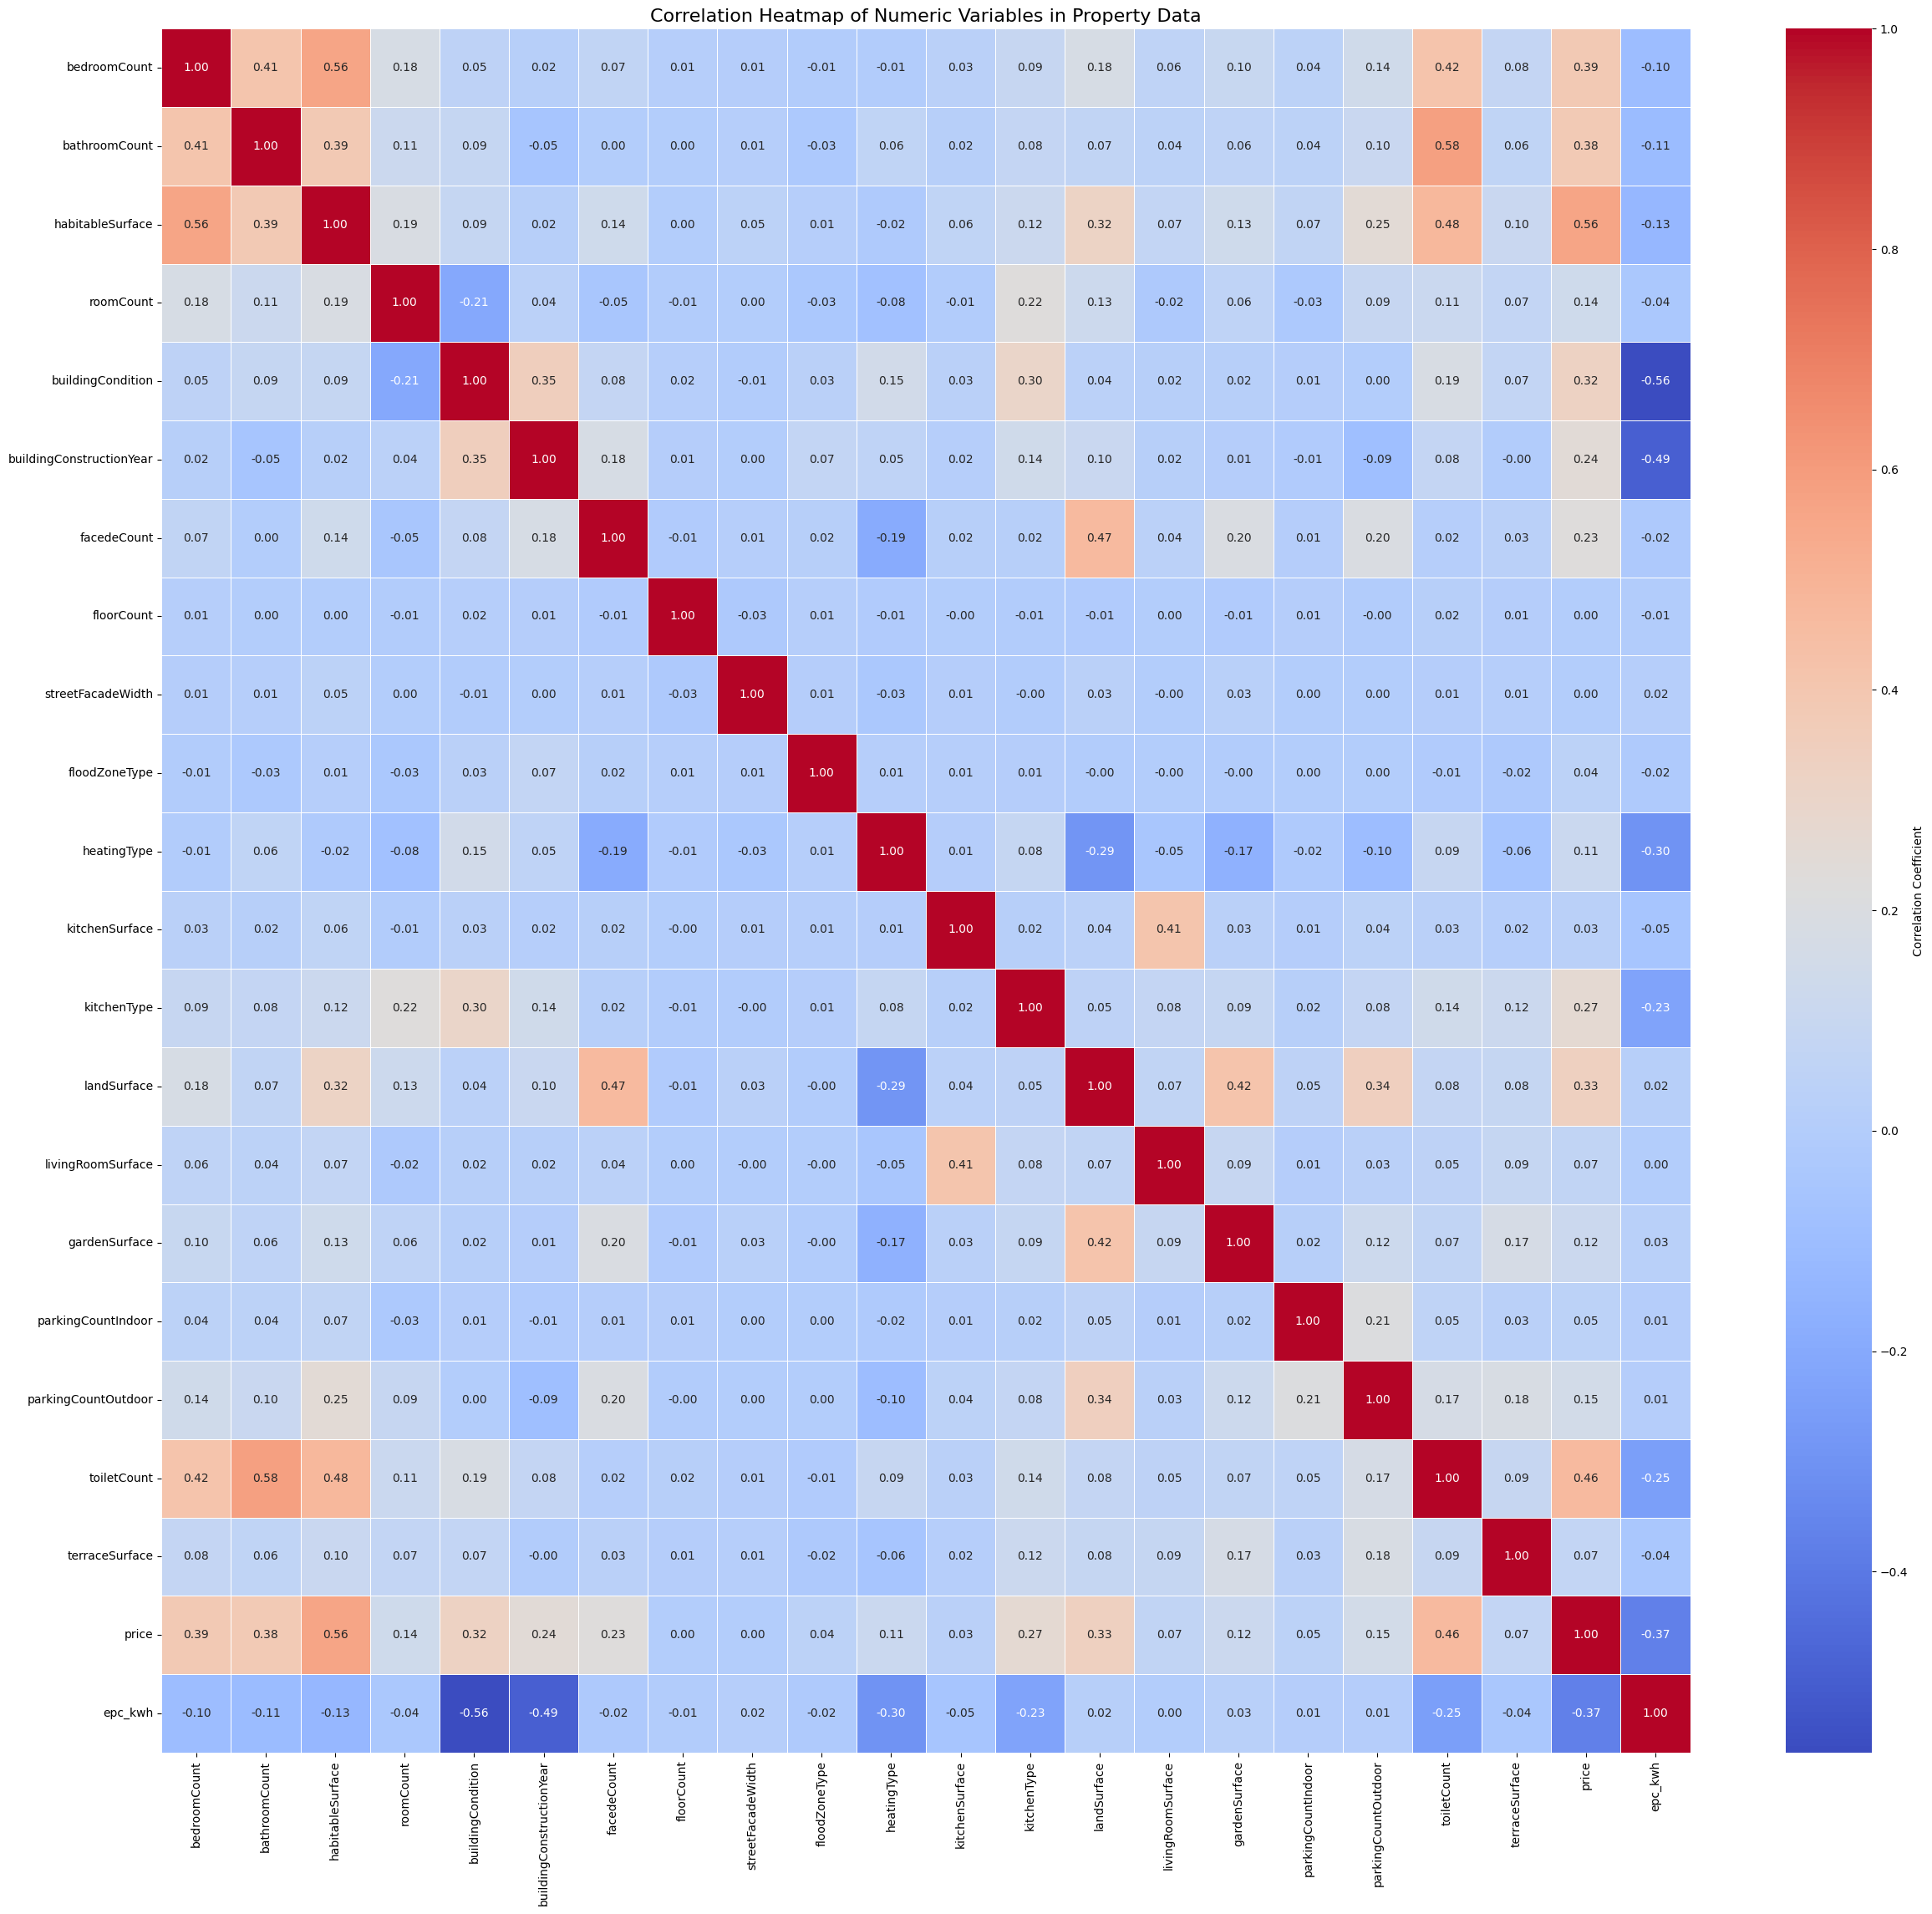

In [1347]:
# Calculate the correlation matrix, excluding propertyId
# Calculate the correlation matrix, selecting only numeric columns to avoid errors
correlation_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

# Create a figure with appropriate size
plt.figure(figsize=(25, 23))

# Create a heatmap with value labels
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=True,  # Show values on the heatmap
    cmap='coolwarm',  # Color map
    fmt='.2f',  # Format for the annotations (2 decimal places)
    linewidths=0.5,  # Width of the lines that divide each cell
    cbar_kws={'label': 'Correlation Coefficient'}  # Colorbar label
)

# Set title
plt.title('Correlation Heatmap of Numeric Variables in Property Data', fontsize=16)

# Adjust layout
plt.tight_layout()

# Display the heatmap
plt.show()

Price Correlation Heatmap

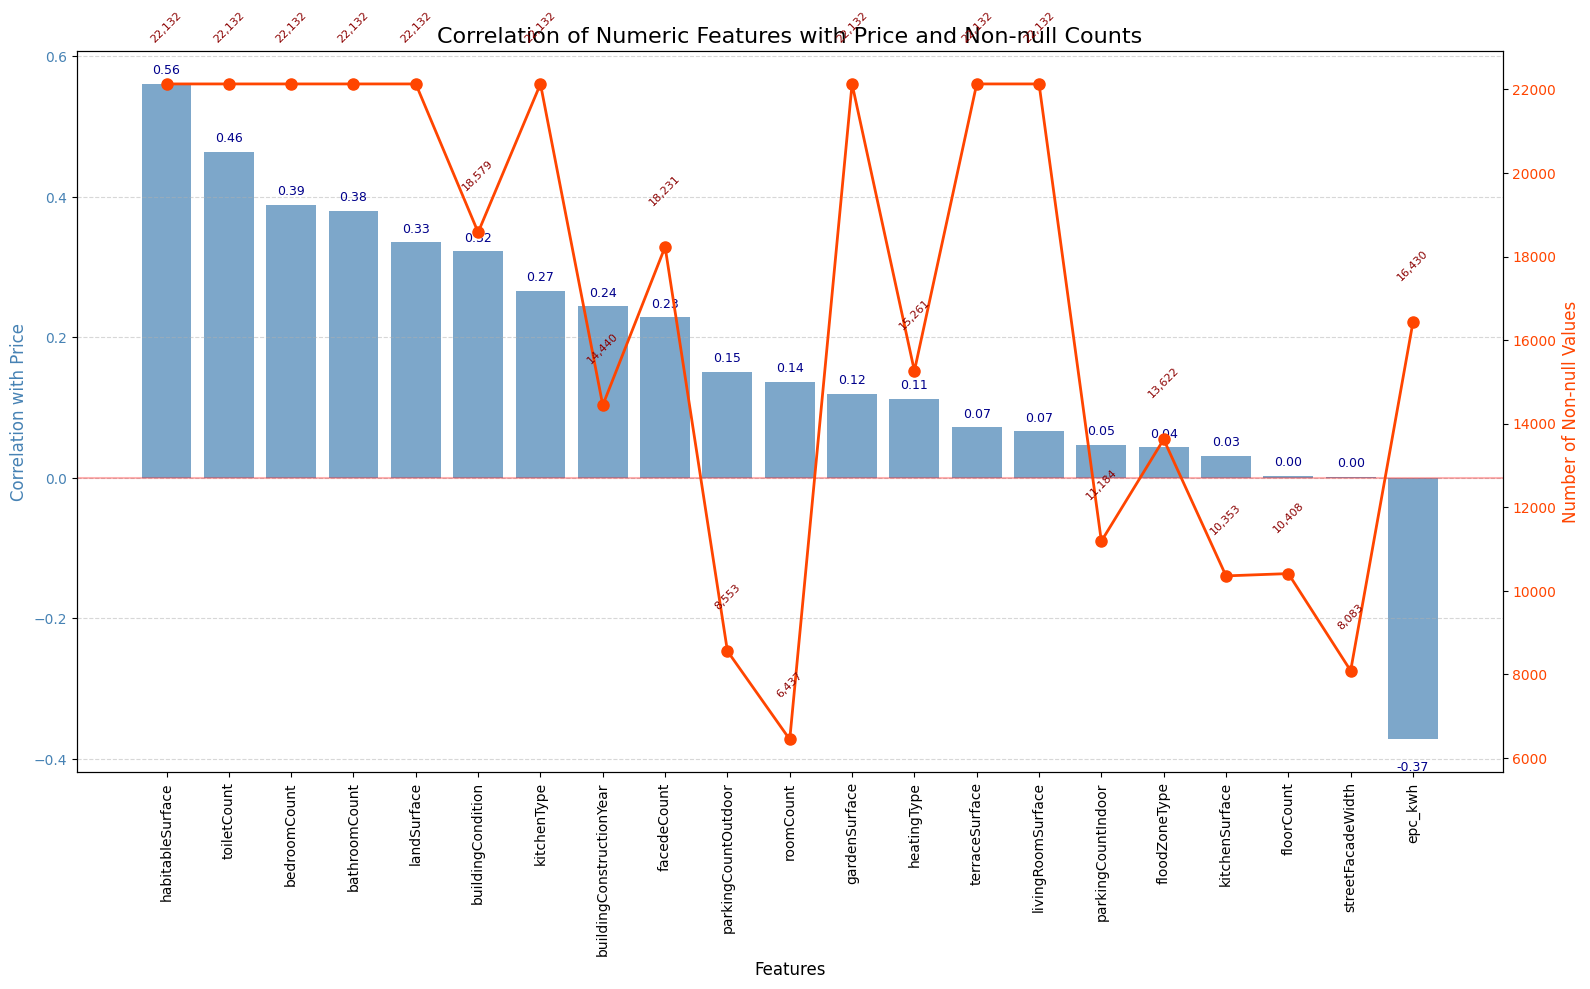

In [1348]:
# Select only numeric columns from the dataframe
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a dictionary to store correlations with price and non-null counts
price_correlations = {}
notna_counts = {}

# Calculate correlation of each numeric column with price and count non-null values
for column in numeric_columns:
    if column != 'price' and column != 'id':  # Exclude price itself and id
        correlation = df[column].corr(df['price'])
        price_correlations[column] = correlation
        notna_counts[column] = df[column].notna().sum()

# Convert to Series for easier plotting
price_corr_series = pd.Series(price_correlations).sort_values(ascending=False)
notna_count_series = pd.Series({k: notna_counts[k] for k in price_corr_series.index})

# Create a figure with two y-axes
fig, ax1 = plt.subplots(figsize=(16, 10))
ax2 = ax1.twinx()

# Create a bar chart for correlations
bars = ax1.bar(price_corr_series.index, price_corr_series.values, color='steelblue', alpha=0.7)

# Add correlation values on top of the bars
for bar in bars:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width() / 2.,
        height + 0.01 if height >= 0 else height - 0.03,
        f'{height:.2f}',
        ha='center', va='bottom' if height >= 0 else 'top',
        fontsize=9, color='darkblue'
    )

# Create a line plot for non-null counts
ax2.plot(price_corr_series.index, notna_count_series.values, 'o-', color='orangered', linewidth=2, markersize=8)

# Add count labels above the line points
for i, count in enumerate(notna_count_series.values):
    ax2.text(i, count + 1000, f'{count:,}', ha='center', rotation=45, fontsize=8, color='darkred')

# Customize the plot
ax1.set_title('Correlation of Numeric Features with Price and Non-null Counts', fontsize=16)
ax1.set_xlabel('Features', fontsize=12)
ax1.set_ylabel('Correlation with Price', color='steelblue', fontsize=12)
ax2.set_ylabel('Number of Non-null Values', color='orangered', fontsize=12)
ax1.tick_params(axis='y', labelcolor='steelblue')
ax2.tick_params(axis='y', labelcolor='orangered')
ax1.set_xticks(range(len(price_corr_series.index)))
ax1.set_xticklabels(price_corr_series.index, rotation=90)
ax1.axhline(y=0, color='r', linestyle='-', alpha=0.3)
ax1.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

Delete poorly correlated columns

In [1349]:
df.drop(columns=['parkingCountIndoor', 'parkingCountOutdoor', 'floorCount', 'streetFacadeWidth', 'kitchenSurface', 'floodZoneType'], inplace=True)

Display missing values again

<Axes: >

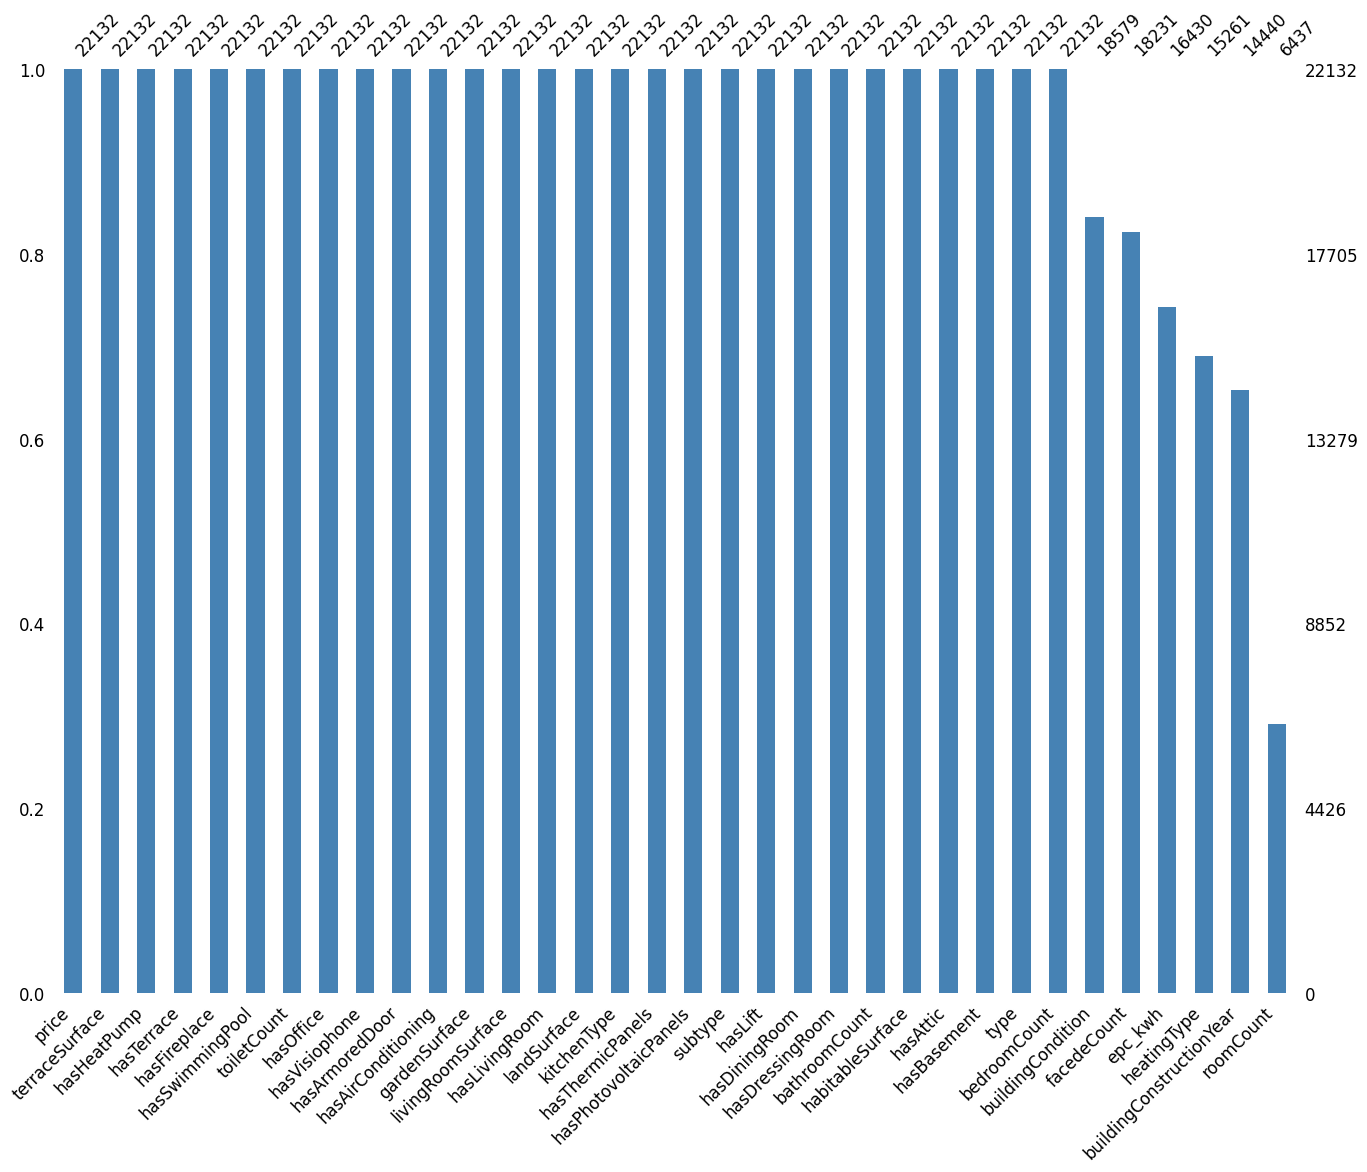

In [1350]:
msno.bar(df, color="steelblue", figsize=(16, 12), fontsize=12, sort="descending")

Replace with means

In [1351]:
# Calculate the mean of bedroomCount
bedroom_mean = int(df['bedroomCount'].mean())

# Replace NaN values with the mean
df['bedroomCount'].fillna(bedroom_mean, inplace=True)

print(f"The mean value used for replacement was: {bedroom_mean:.2f}")

The mean value used for replacement was: 3.00


C:\Users\ImJus\AppData\Local\Temp\ipykernel_15204\2175616926.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bedroomCount'].fillna(bedroom_mean, inplace=True)


In [1352]:
# Calculate the mean of habitableSurface
bedroom_mean = int(df['habitableSurface'].mean())

# Replace NaN values with the mean
df['habitableSurface'].fillna(bedroom_mean, inplace=True)

print(f"The mean value used for replacement was: {bedroom_mean:.2f}")

The mean value used for replacement was: 189.00


C:\Users\ImJus\AppData\Local\Temp\ipykernel_15204\2037740726.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['habitableSurface'].fillna(bedroom_mean, inplace=True)


In [1353]:
# Calculate the mean of bathroomCount
bedroom_mean = int(df['bathroomCount'].mean())

# Replace NaN values with the mean
df['bathroomCount'].fillna(bedroom_mean, inplace=True)

print(f"The mean value used for replacement was: {bedroom_mean:.2f}")

The mean value used for replacement was: 1.00


C:\Users\ImJus\AppData\Local\Temp\ipykernel_15204\1905525480.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bathroomCount'].fillna(bedroom_mean, inplace=True)


Display missing values again

<Axes: >

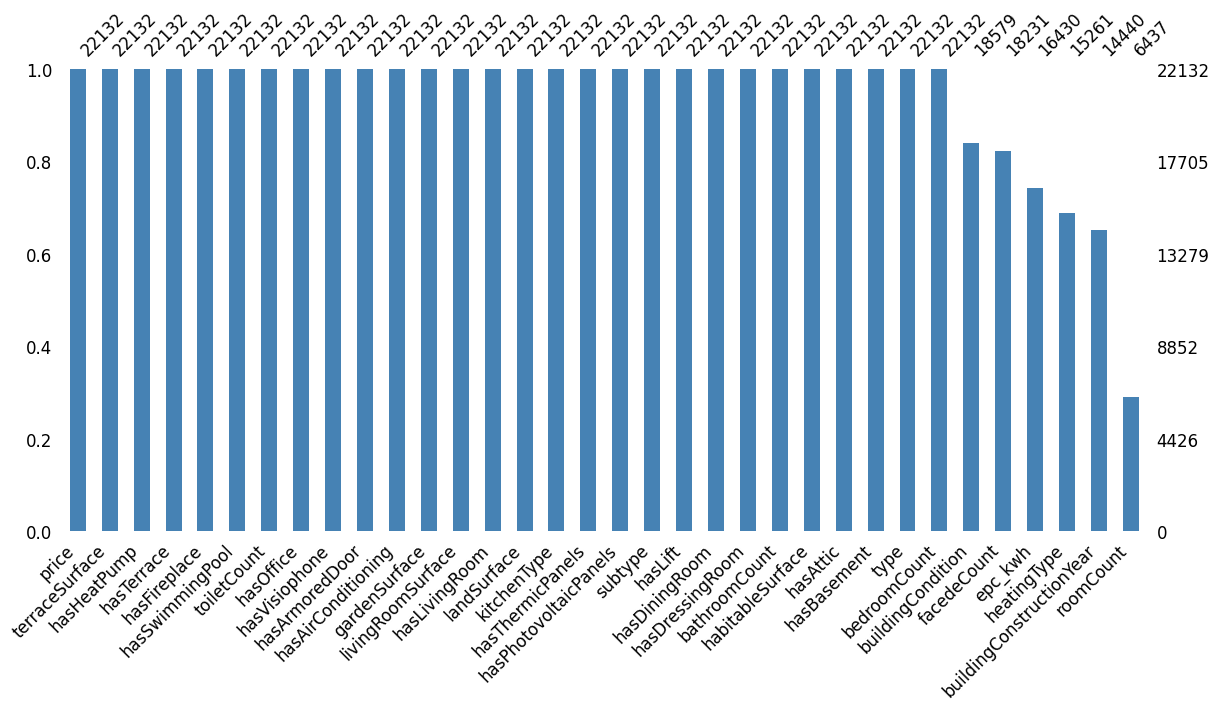

In [1354]:
msno.bar(df, color="steelblue", figsize=(14, 6), fontsize=12, sort="descending")

Display correlation heatmap again

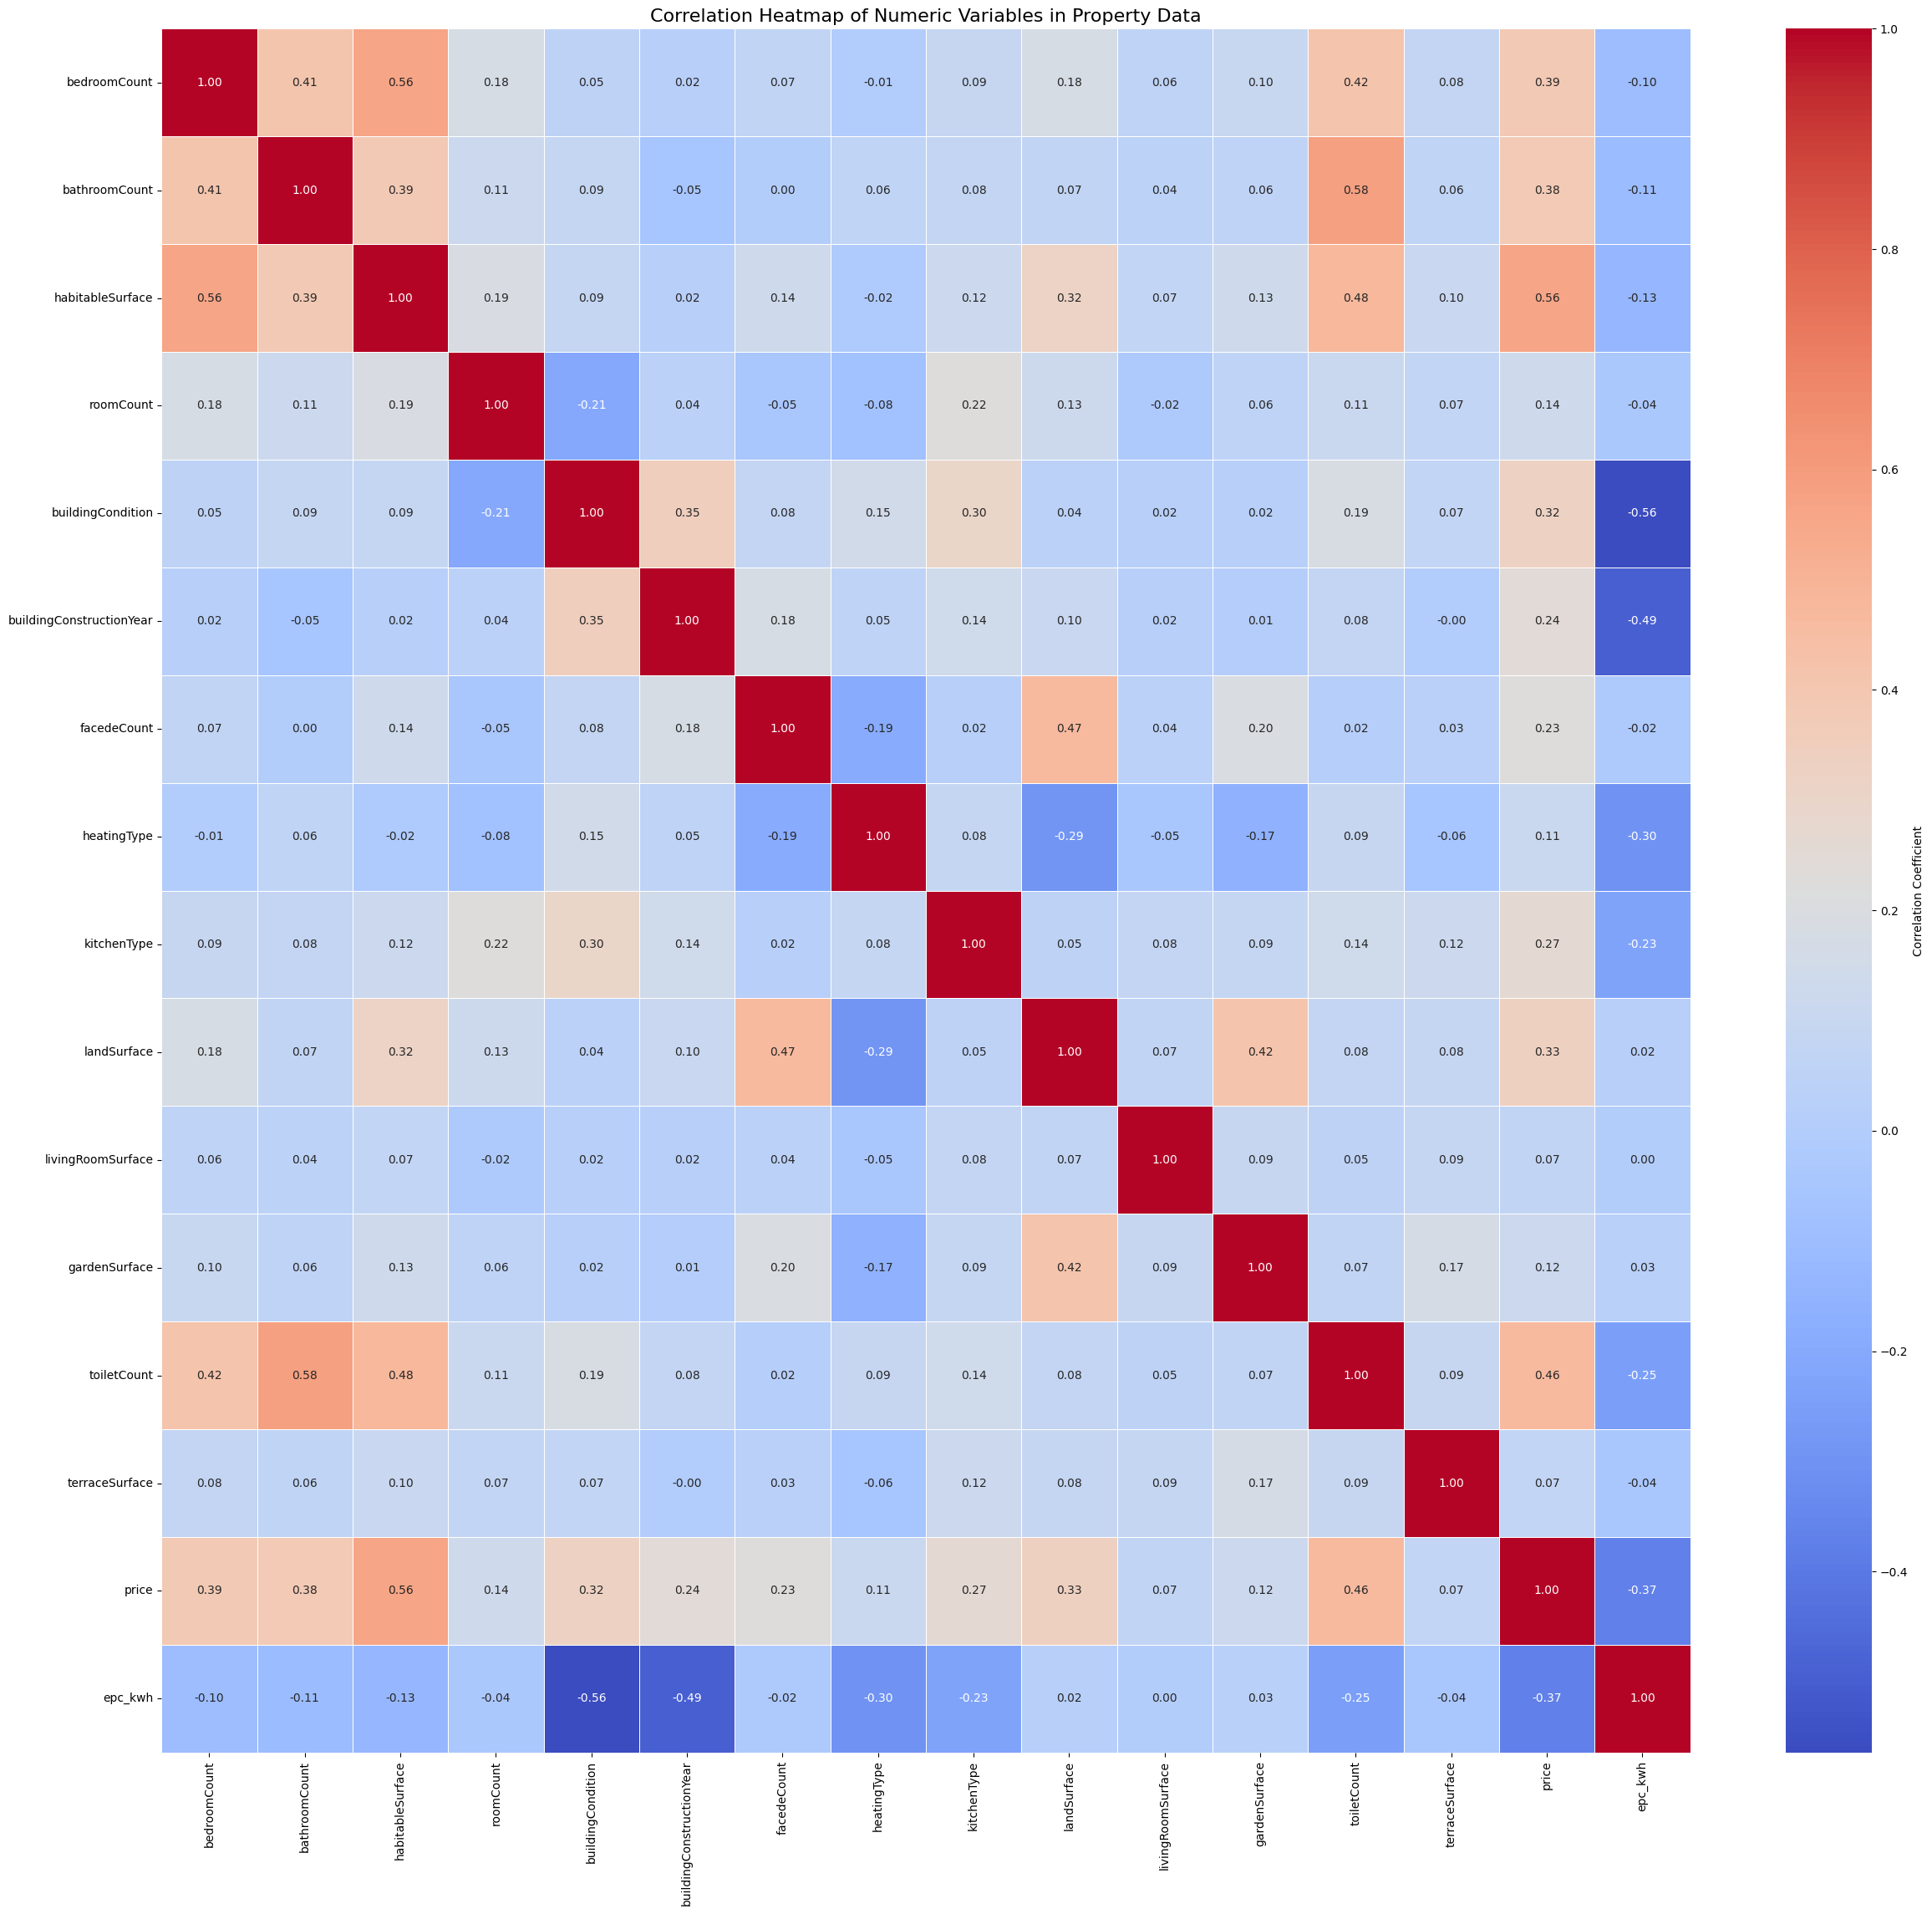

In [1355]:
# Calculate the correlation matrix, excluding propertyId
# Calculate the correlation matrix, selecting only numeric columns to avoid errors
correlation_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

# Create a figure with appropriate size
plt.figure(figsize=(25, 23))

# Create a heatmap with value labels
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=True,  # Show values on the heatmap
    cmap='coolwarm',  # Color map
    fmt='.2f',  # Format for the annotations (2 decimal places)
    linewidths=0.5,  # Width of the lines that divide each cell
    cbar_kws={'label': 'Correlation Coefficient'}  # Colorbar label
)

# Set title
plt.title('Correlation Heatmap of Numeric Variables in Property Data', fontsize=16)

# Adjust layout
plt.tight_layout()

# Display the heatmap
plt.show()

Try to impute buildingCondition

In [1356]:
# Only include numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# First, let's see the correlation of buildingCondition with other features
corr_with_condition = numeric_df.corr()['buildingCondition'].sort_values(ascending=False)
# Create a mask for rows where buildingCondition is not NA
mask_valid = df['buildingCondition'].notna()

# Select features that correlate well with buildingCondition and have fewer missing values
# From the correlation matrix we can see that epc_kwh and buildingConstructionYear have strong correlations
features = ['epc_kwh', 'buildingConstructionYear', 'kitchenType', 'toiletCount', 'habitableSurface', 'price']

# Make sure to only select numeric features that exist in the DataFrame
features = [f for f in features if f in numeric_df.columns]

print(f"\nSelected features for prediction: {features}")

# Filter out rows with NA in any of the selected features
X_mask = df[features].notna().all(axis=1) & mask_valid
X = df.loc[X_mask, features]
y = df.loc[X_mask, 'buildingCondition']

# Split data for validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate model on test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel performance:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Print feature importances
importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
print("\nFeature importance:")
print(importance.sort_values('Coefficient', ascending=False))

# Predict missing values
missing_mask = df['buildingCondition'].isna()
print(f"\nMissing buildingCondition values: {missing_mask.sum()}")

# For rows with missing buildingCondition, prepare feature data
X_missing = df.loc[missing_mask, features].dropna()
print(f"Rows that can be predicted: {len(X_missing)}")

# Predict and fill missing values where possible
if len(X_missing) > 0:
    predictions = model.predict(X_missing)
    # Round to nearest integer and clip to valid range (0-5)
    predictions = np.clip(np.round(predictions), 0, 5)
    
    # Update the dataframe with predictions
    df.loc[X_missing.index, 'buildingCondition'] = predictions

# Check how many values are still missing
remaining_missing = df['buildingCondition'].isna().sum()
print(f"Remaining missing buildingCondition values: {remaining_missing}")

# Fill any remaining missing values with the median
if remaining_missing > 0:
    median_value = df['buildingCondition'].median()
    df['buildingCondition'].fillna(median_value, inplace=True)
    print(f"Filled remaining missing values with median: {median_value}")

# Verify no missing values remain
print(f"Missing values after imputation: {df['buildingCondition'].isna().sum()}")


Selected features for prediction: ['epc_kwh', 'buildingConstructionYear', 'kitchenType', 'toiletCount', 'habitableSurface', 'price']

Model performance:
Mean Squared Error: 1.0653
R² Score: 0.3601

Feature importance:
                    Feature   Coefficient
2               kitchenType  9.907485e-02
3               toiletCount  6.429733e-02
1  buildingConstructionYear  1.618421e-03
5                     price  8.601936e-07
4          habitableSurface -1.394831e-03
0                   epc_kwh -3.749261e-03

Missing buildingCondition values: 3553
Rows that can be predicted: 1345
Remaining missing buildingCondition values: 2208
Filled remaining missing values with median: 3.0
Missing values after imputation: 0


C:\Users\ImJus\AppData\Local\Temp\ipykernel_15204\1625325691.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['buildingCondition'].fillna(median_value, inplace=True)


Try to imput epc_kwh

In [1357]:
# Only include numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# First, let's see the correlation of epc_kwh with other features
corr_with_epc = numeric_df.corr()['epc_kwh'].sort_values(ascending=False)

# Create a mask for rows where epc_kwh is not NA
mask_valid = df['epc_kwh'].notna()

# Select features that correlate well with epc_kwh and have fewer missing values
features = ['buildingCondition', 'buildingConstructionYear', 'kitchen_type', 'heatingType', 'toiletCount', 'price', 'habitableSurface', 'bedroomCount', 'bathroomCount']

# Make sure to only select numeric features that exist in the DataFrame
features = [f for f in features if f in numeric_df.columns]

print(f"\nSelected features for prediction: {features}")

# Filter out rows with NA in any of the selected features
X_mask = df[features].notna().all(axis=1) & mask_valid
X = df.loc[X_mask, features]
y = df.loc[X_mask, 'epc_kwh']

# Split data for validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate model on test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel performance:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Print feature importances
importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
print("\nFeature importance:")
print(importance.sort_values('Coefficient', ascending=False))

# Predict missing values
missing_mask = df['epc_kwh'].isna()
print(f"\nMissing epc_kwh values: {missing_mask.sum()}")

# For rows with missing epc_kwh, prepare feature data
X_missing = df.loc[missing_mask, features].dropna()
print(f"Rows that can be predicted: {len(X_missing)}")

# Predict and fill missing values where possible
if len(X_missing) > 0:
    predictions = model.predict(X_missing)
    # Clip to reasonable range (epc_kwh values typically range from 75 to 550)
    predictions = np.clip(predictions, 75, 550)
    
    # Update the dataframe with predictions
    df.loc[X_missing.index, 'epc_kwh'] = predictions

# Check how many values are still missing
remaining_missing = df['epc_kwh'].isna().sum()
print(f"Remaining missing epc_kwh values: {remaining_missing}")

# Fill any remaining missing values with the median
if remaining_missing > 0:
    median_value = df['epc_kwh'].median()
    df['epc_kwh'].fillna(median_value, inplace=True)
    print(f"Filled remaining missing values with median: {median_value}")

# Verify no missing values remain
print(f"Missing values after imputation: {df['epc_kwh'].isna().sum()}")


Selected features for prediction: ['buildingCondition', 'buildingConstructionYear', 'heatingType', 'toiletCount', 'price', 'habitableSurface', 'bedroomCount', 'bathroomCount']

Model performance:
Mean Squared Error: 11574.3329
R² Score: 0.4097

Feature importance:
                    Feature  Coefficient
7             bathroomCount     3.745490
4                     price    -0.000035
5          habitableSurface    -0.051837
6              bedroomCount    -0.367420
1  buildingConstructionYear    -0.925816
3               toiletCount   -15.336546
2               heatingType   -29.852786
0         buildingCondition   -47.320721

Missing epc_kwh values: 5702
Rows that can be predicted: 2019
Remaining missing epc_kwh values: 3683
Filled remaining missing values with median: 300.0
Missing values after imputation: 0


C:\Users\ImJus\AppData\Local\Temp\ipykernel_15204\1915494394.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['epc_kwh'].fillna(median_value, inplace=True)


Drop roomCount & dropna + drop type column because only 1 remain

<Axes: >

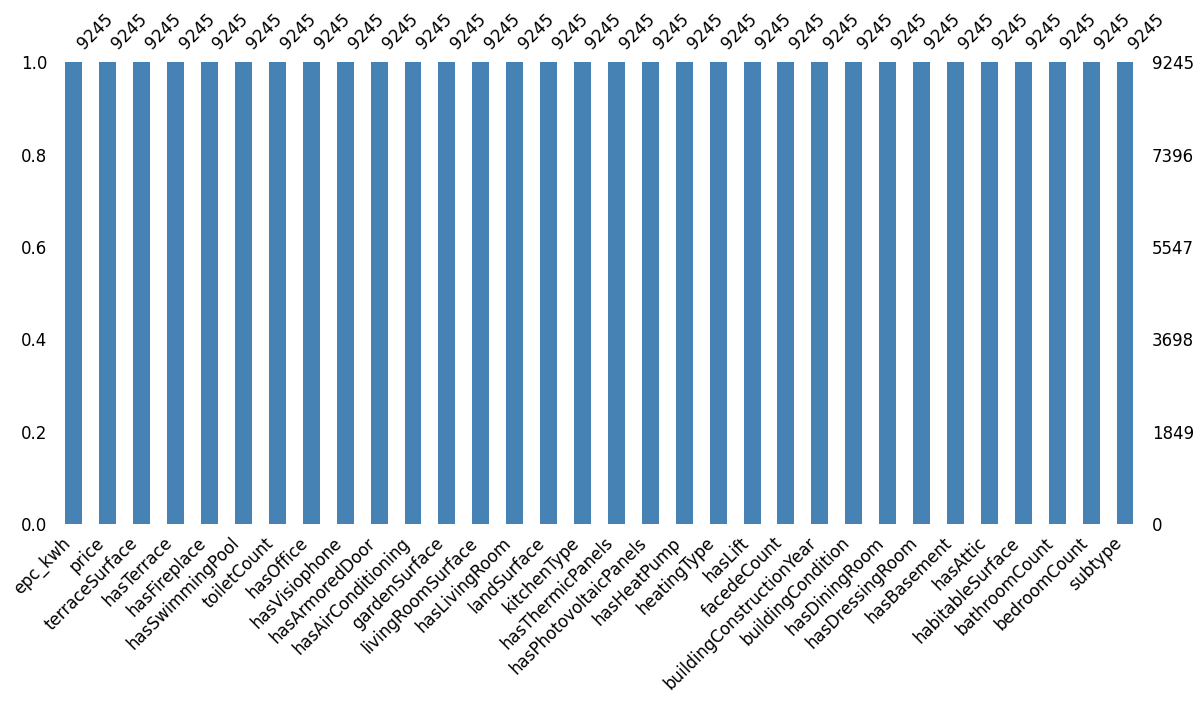

In [1358]:
df.drop(columns='roomCount', inplace=True)
df.dropna(inplace=True)

#drop type column because only houses remain :/
df.drop(columns='type', inplace=True)

msno.bar(df, color="steelblue", figsize=(14, 6), fontsize=12, sort="descending")

Replace True_False with 1_0

In [1359]:
# Convert boolean columns to integers (True -> 1, False -> 0)
bool_columns = df.select_dtypes(include='bool').columns
for column in bool_columns:
    df[column] = df[column].astype(int)

# Verify the conversion
print(f"Converted {len(bool_columns)} boolean columns to integers:")
print(bool_columns.tolist())
print("\nDataFrame dtypes after conversion:")
print(df.dtypes.value_counts())

Converted 16 boolean columns to integers:
['hasAttic', 'hasBasement', 'hasDressingRoom', 'hasDiningRoom', 'hasLift', 'hasHeatPump', 'hasPhotovoltaicPanels', 'hasThermicPanels', 'hasLivingRoom', 'hasAirConditioning', 'hasArmoredDoor', 'hasVisiophone', 'hasOffice', 'hasSwimmingPool', 'hasFireplace', 'hasTerrace']

DataFrame dtypes after conversion:
int64      17
float64    14
object      1
Name: count, dtype: int64


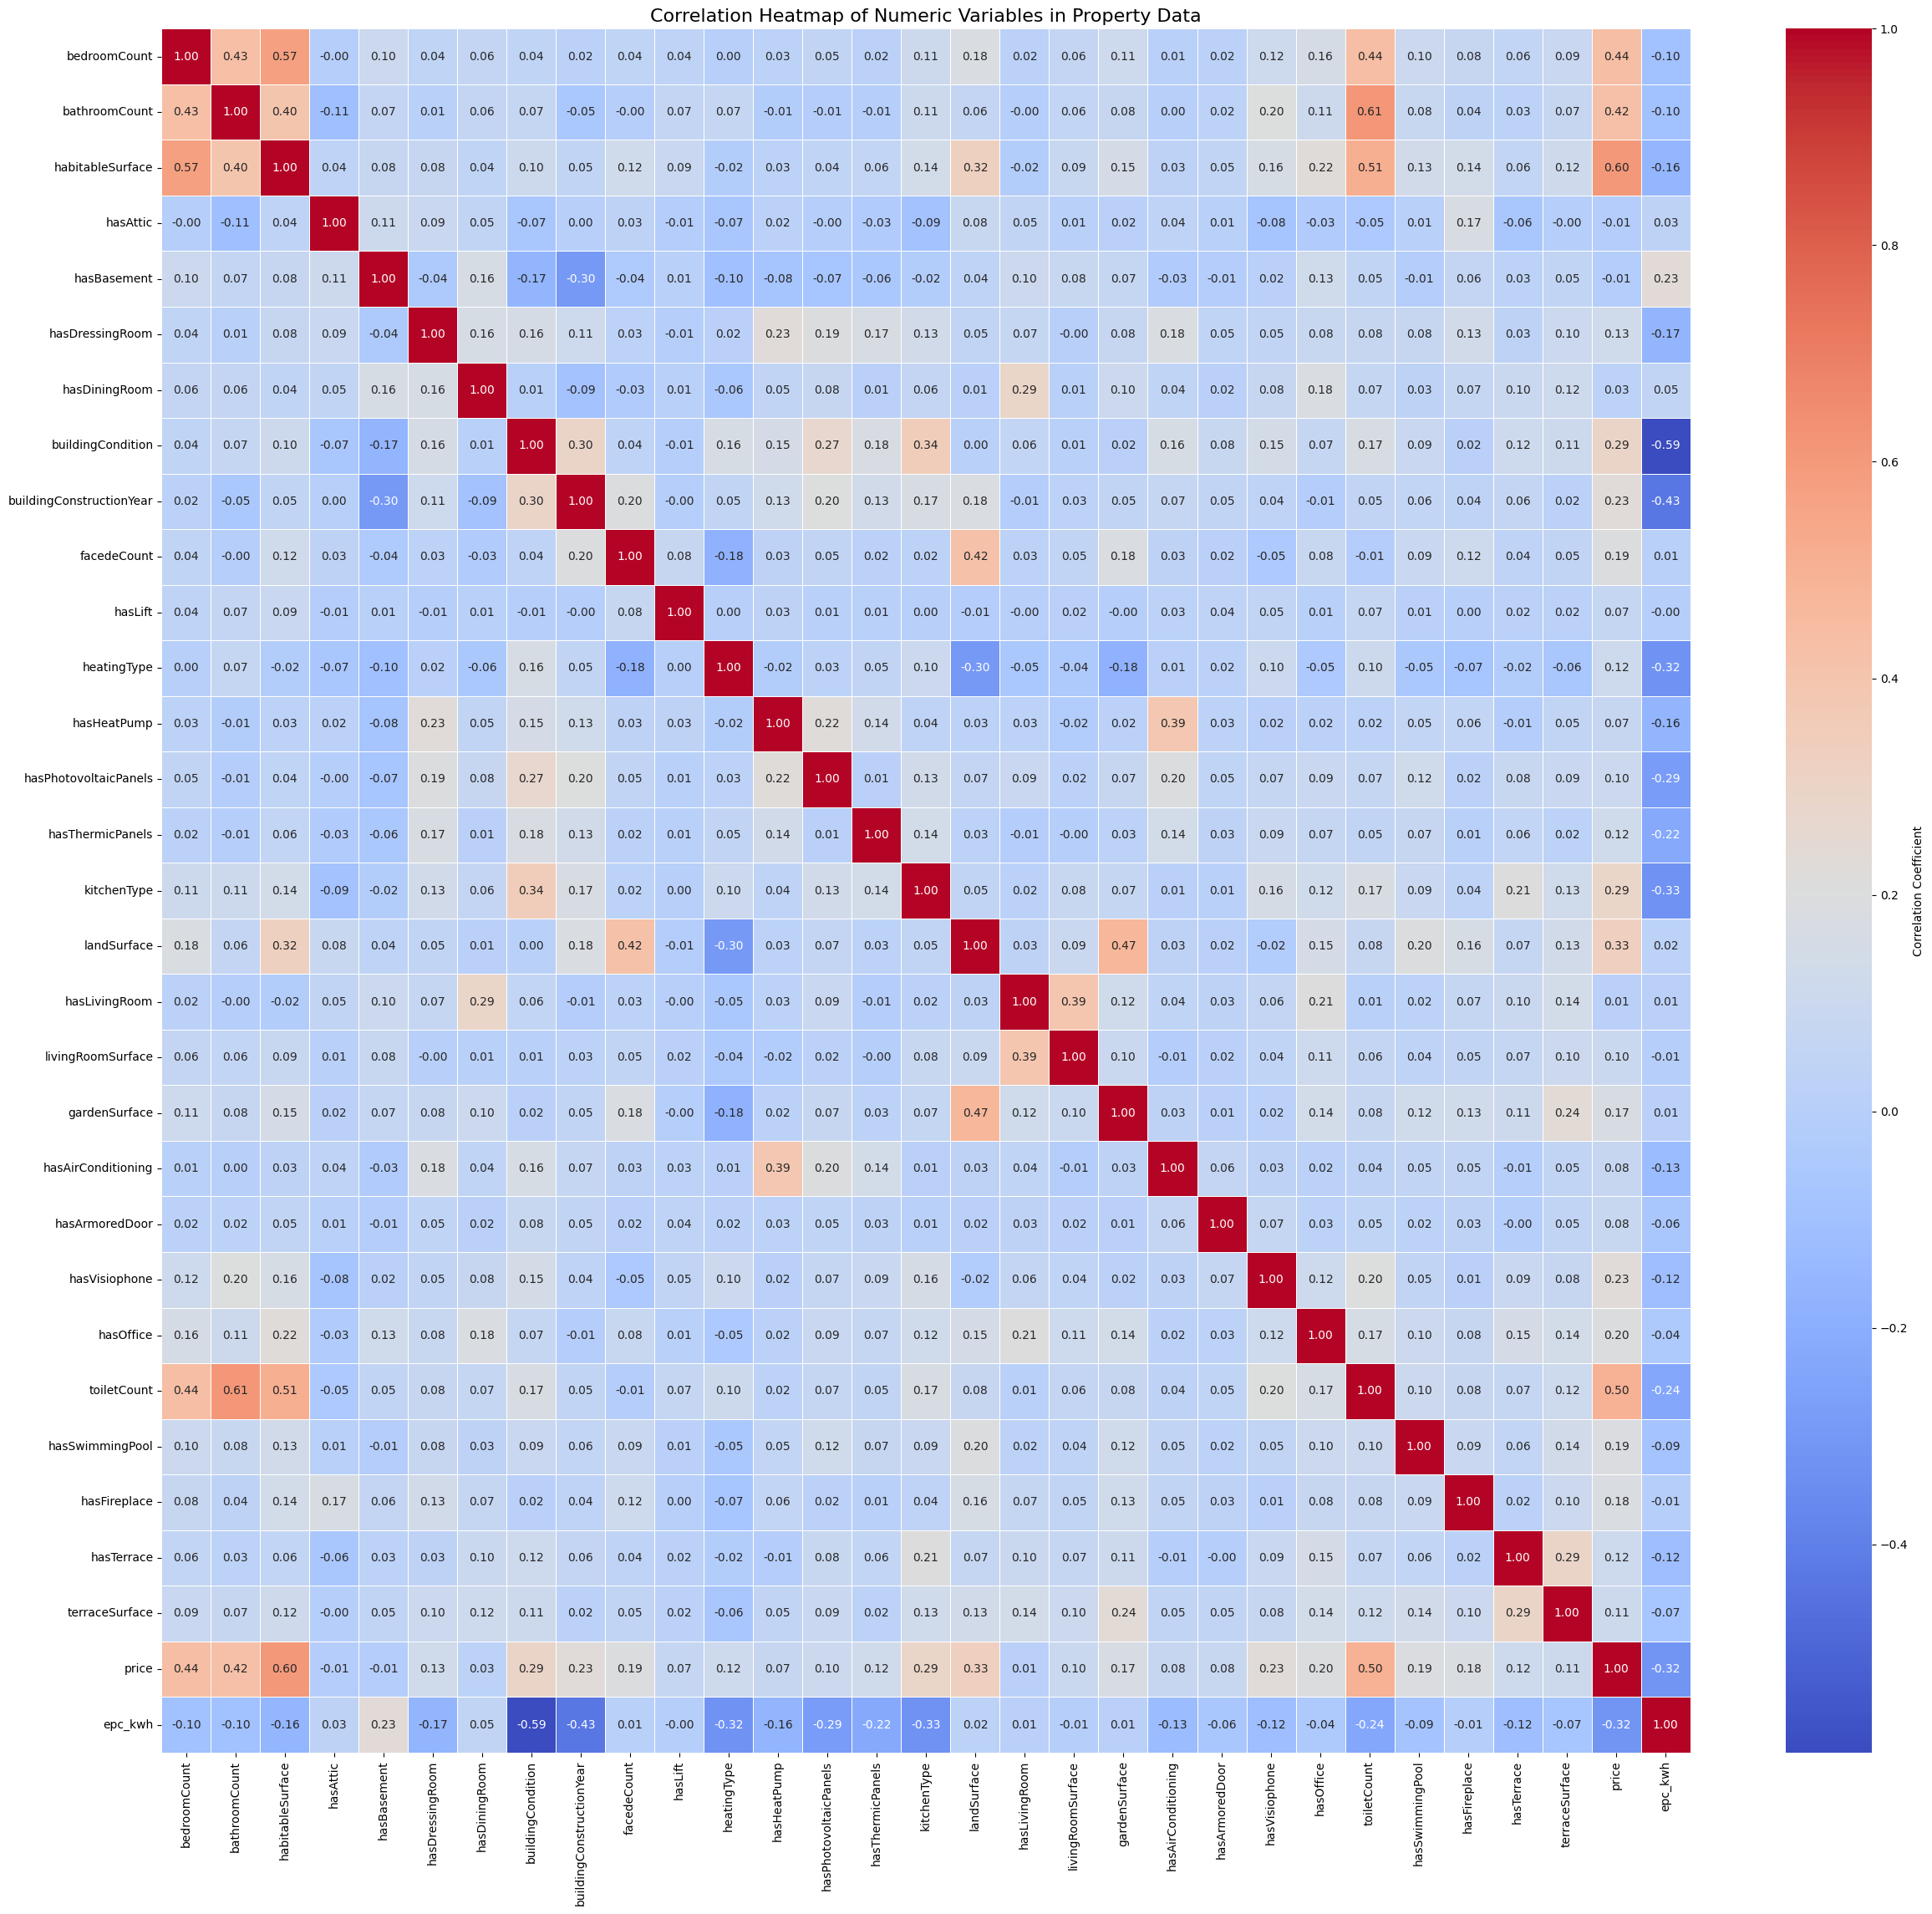

In [1360]:
# Calculate the correlation matrix, excluding propertyId
# Calculate the correlation matrix, selecting only numeric columns to avoid errors
correlation_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

# Create a figure with appropriate size
plt.figure(figsize=(25, 23))

# Create a heatmap with value labels
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=True,  # Show values on the heatmap
    cmap='coolwarm',  # Color map
    fmt='.2f',  # Format for the annotations (2 decimal places)
    linewidths=0.5,  # Width of the lines that divide each cell
    cbar_kws={'label': 'Correlation Coefficient'}  # Colorbar label
)

# Set title
plt.title('Correlation Heatmap of Numeric Variables in Property Data', fontsize=16)

# Adjust layout
plt.tight_layout()

# Display the heatmap
plt.show()

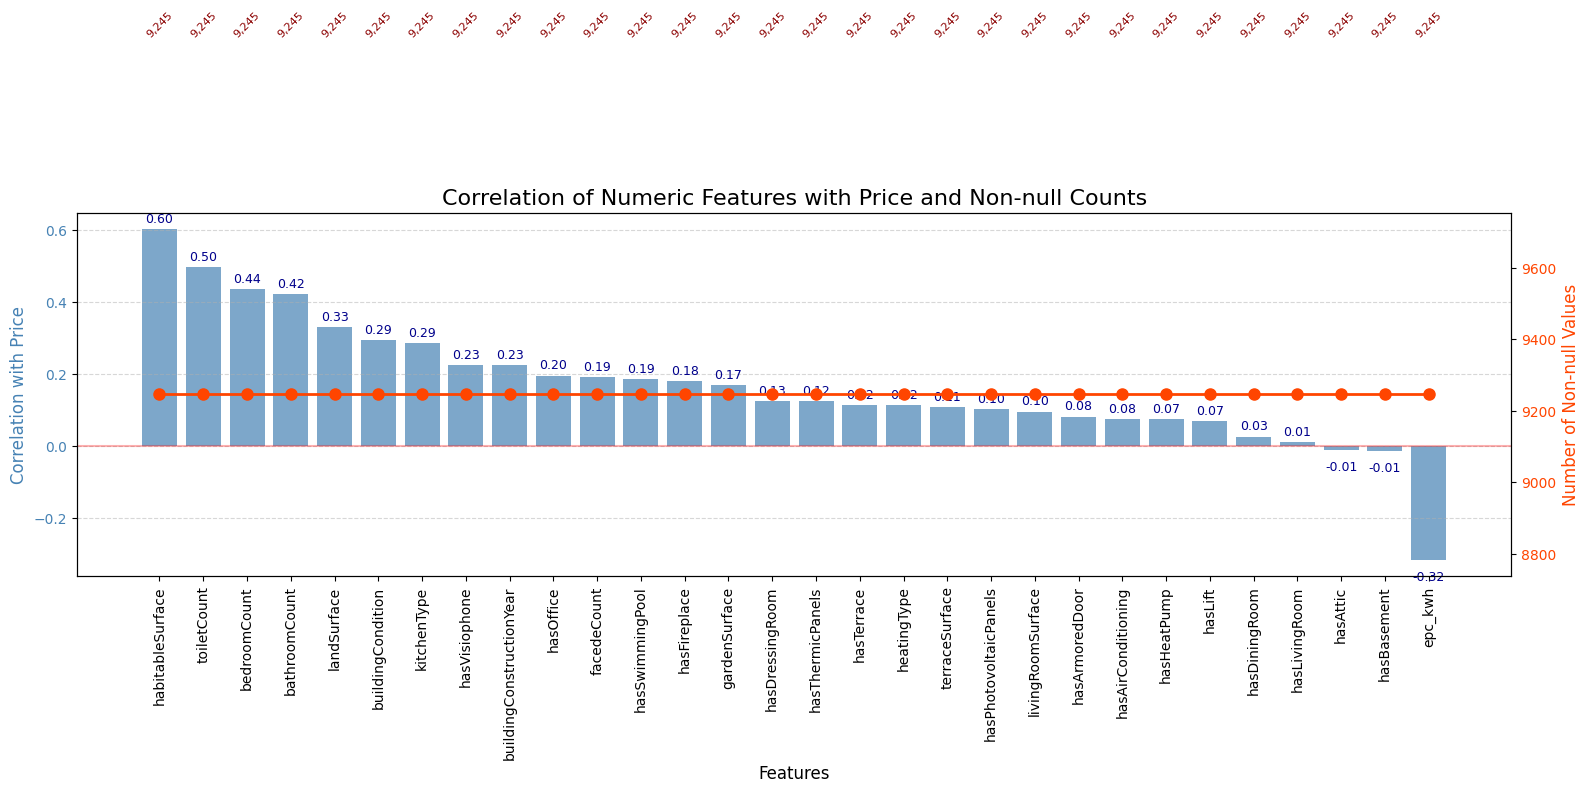

In [1361]:
# Select only numeric columns from the dataframe
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a dictionary to store correlations with price and non-null counts
price_correlations = {}
notna_counts = {}

# Calculate correlation of each numeric column with price and count non-null values
for column in numeric_columns:
    if column != 'price' and column != 'id':  # Exclude price itself and id
        correlation = df[column].corr(df['price'])
        price_correlations[column] = correlation
        notna_counts[column] = df[column].notna().sum()

# Convert to Series for easier plotting
price_corr_series = pd.Series(price_correlations).sort_values(ascending=False)
notna_count_series = pd.Series({k: notna_counts[k] for k in price_corr_series.index})

# Create a figure with two y-axes
fig, ax1 = plt.subplots(figsize=(16, 10))
ax2 = ax1.twinx()

# Create a bar chart for correlations
bars = ax1.bar(price_corr_series.index, price_corr_series.values, color='steelblue', alpha=0.7)

# Add correlation values on top of the bars
for bar in bars:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width() / 2.,
        height + 0.01 if height >= 0 else height - 0.03,
        f'{height:.2f}',
        ha='center', va='bottom' if height >= 0 else 'top',
        fontsize=9, color='darkblue'
    )

# Create a line plot for non-null counts
ax2.plot(price_corr_series.index, notna_count_series.values, 'o-', color='orangered', linewidth=2, markersize=8)

# Add count labels above the line points
for i, count in enumerate(notna_count_series.values):
    ax2.text(i, count + 1000, f'{count:,}', ha='center', rotation=45, fontsize=8, color='darkred')

# Customize the plot
ax1.set_title('Correlation of Numeric Features with Price and Non-null Counts', fontsize=16)
ax1.set_xlabel('Features', fontsize=12)
ax1.set_ylabel('Correlation with Price', color='steelblue', fontsize=12)
ax2.set_ylabel('Number of Non-null Values', color='orangered', fontsize=12)
ax1.tick_params(axis='y', labelcolor='steelblue')
ax2.tick_params(axis='y', labelcolor='orangered')
ax1.set_xticks(range(len(price_corr_series.index)))
ax1.set_xticklabels(price_corr_series.index, rotation=90)
ax1.axhline(y=0, color='r', linestyle='-', alpha=0.3)
ax1.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

Drop least useful columns

In [1362]:
df.drop(columns=['hasBasement', 'hasAttic', 'hasLivingRoom', 'hasDiningRoom'], inplace=True)

### Finally save the cleaned dataset

In [1363]:
# Save the cleaned dataset to CSV
df.to_csv('./datasets/kangaroo-cleaned.csv', index=False)
print(f"Dataset saved with {len(df)} rows and {len(df.columns)} columns")

Dataset saved with 9245 rows and 28 columns
